[AirLLM](https://github.com/lyogavin/Anima/tree/main/air_llm)

[Github models](https://github.com/AI4Finance-Foundation/FinGPT/tree/master)

[Leaderboard](https://huggingface.co/spaces/HuggingFaceH4/open_llm_leaderboard)

# Install Libraries

In [ ]:
!pip install transformers==4.32.0 peft==0.5.0
!pip install sentencepiece
!pip install accelerate
!pip install torch
!pip install peft
!pip install datasets
!pip install bitsandbytes
# !pip install airllm

In [ ]:
#for the `load_in_8bit=True` error
!pip install protobuf transformers==4.32.0 cpm_kernels torch>=2.0 gradio mdtex2html sentencepiece accelerate

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00


# Import Libraries

In [ ]:
from transformers import AutoModel, AutoTokenizer, AutoModelForCausalLM, LlamaForCausalLM, LlamaTokenizerFast
from peft import PeftModel  # 0.5.0
from transformers import pipeline
# from airllm import AutoModel

**Fine-tuned llama2-13b model with LoRA**

In [ ]:
# base_model = "NousResearch/Llama-2-13b-hf"
# peft_model = "FinGPT/fingpt-sentiment_llama2-13b_lora"

# base_model = 'base_models/mpt-7b-peft-compatible'
# peft_model = 'FinGPT/fingpt-mt_llama2-7b_lora'

# config = PeftConfig.from_pretrained("FinGPT/fingpt-mt_mpt-7b_lora")
# model = AutoModelForCausalLM.from_pretrained(base_model)
# model = PeftModel.from_pretrained(model, peft_model)
# tokenizer = AutoTokenizer.from_pretrained(base_model, trust_remote_code=True)
# tokenizer.pad_token = tokenizer.eos_token
# tokenizer = AutoTokenizer.from_pretrained(base_model, trust_remote_code=True)
# tokenizer.pad_token = tokenizer.eos_token

[FALCON](https://huggingface.co/tiiuae/falcon-7b-instruct)

In [ ]:
model = model.eval()

In [ ]:
# Make prompts
prompt = [
'''Instruction: What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}
Input: FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .
Answer: ''',
'''Instruction: What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}
Input: According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .
Answer: ''',
'''Instruction: What is the sentiment of this news? Please choose an answer from {negative/neutral/positive}
Input: A tinyurl link takes users to a scamming site promising that users can earn thousands of dollars by becoming a Google ( NASDAQ : GOOG ) Cash advertiser .
Answer: ''',
]

In [ ]:
# Generate results
def generate_inference():
  global model
  tokens = tokenizer(prompt, return_tensors='pt', padding=True, max_length=512)
  res = model.generate(**tokens, max_length=512)
  res_sentences = [tokenizer.decode(i) for i in res]
  out_text = [o.split("Answer: ")[1] for o in res_sentences]
  return out_text


In [ ]:
# Sample
out_text = generate_inference()
for sentiment in out_text:
    print(sentiment)

 positive</s>
 neutral</s>
 negative</s>


In [ ]:
len(prompt)

10957

In [ ]:
sentiments = generate_inference()

In [ ]:
for sentiment in sentiments:
    print(sentiment)

# Mounting Google drive

In [ ]:
#CONNECT TO GOOGLE DRIVE
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# !cd drive/Othercomputers
# Set the path to your Google Drive folder

# drive_path = '/content/drive/MyDrive/Fine tuning'
# files_in_root = os.listdir(drive_path)
# print("Files in the root of Google Drive:")
# print(files_in_root)

Mounted at /content/drive


# Import dataset

In [ ]:
#LOAD CSV FILE FROM DRIVE
import pandas as pd
import os
drive_path = '/content/drive/MyDrive/Fine tuning'
df = pd.read_csv(drive_path+"/headlines_with_sent_2.csv")
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Headlines,link,finbert_sent_label,score,finbert_finetuned_label,score.1,roberta_label,score.2
0,0,0,Tech companies gear up to kick-start earnings-...,https://www.financialexpress.com/market/tech-c...,neutral,0.998980,neutral,0.775444,positive,0.999447
1,1,1,Nifty momentum to continue in short-term says ...,https://www.financialexpress.com/market/cafein...,positive,0.792147,positive,0.770515,positive,0.999531


#Labelling

## 1st LLM - **[FINBERT](https://huggingface.co/yiyanghkust/finbert-tone)**

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

In [ ]:
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

sentences = ["there is a shortage of capital, and we need extra financing",
             "growth is strong and we have plenty of liquidity",
             "there are doubts about our finances",
             "profits are flat"]
results = nlp(sentences)
print(results)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

[{'label': 'Negative', 'score': 0.9966173768043518}, {'label': 'Positive', 'score': 1.0}, {'label': 'Negative', 'score': 0.9999710321426392}, {'label': 'Neutral', 'score': 0.9889442920684814}]


In [ ]:
#CONVERT INPUT TO PROMPT TEMPLATE
prompt = [f"Instruction: What is the sentiment of this input? Please choose an answer from <negative/neutral/positive> \
Input: {headline}. \
Answer:" for headline in df.Headlines]

In [ ]:
prompt[0:2]

['Instruction: What is the sentiment of this input? Please choose an answer from <negative/neutral/positive> Input: Tech companies gear up to kick-start earnings- A look at how IT stocks performed in Q4. Answer:',
 'Instruction: What is the sentiment of this input? Please choose an answer from <negative/neutral/positive> Input: Nifty momentum to continue in short-term says HDFC Securities; top picks include Bikaji, NMDC. Answer:']

In [ ]:
Sentiment_output = nlp(prompt)

In [ ]:
Sentiment_output[1000:1005]

[{'label': 'Positive', 'score': 0.9959194660186768},
 {'label': 'Neutral', 'score': 0.9997220635414124},
 {'label': 'Neutral', 'score': 0.9984096884727478},
 {'label': 'Positive', 'score': 0.9999990463256836},
 {'label': 'Neutral', 'score': 0.9954324960708618}]

In [ ]:
sentiment_labels = [d['label'] for d in Sentiment_output]
scores = [d['score'] for d in Sentiment_output]

# Create DataFrame from the extracted values
finbert_sent = pd.DataFrame({'finbert_sent_label': sentiment_labels, 'score': scores})

In [ ]:
len(finbert_sent)

10957

## 2nd LLM - **[Finbert-tone-finetuned](https://huggingface.co/nickmuchi/finbert-tone-finetuned-fintwitter-classification)**

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("nickmuchi/finbert-tone-finetuned-fintwitter-classification")
model = AutoModelForSequenceClassification.from_pretrained("nickmuchi/finbert-tone-finetuned-fintwitter-classification")

tokenizer_config.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/853 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [ ]:
nlp_finbert_finetuned = pipeline("text-classification", model=model,tokenizer=tokenizer)

In [ ]:
prompt_2 = [d for d in df.Headlines]

In [ ]:
Sentiment_output_2 = nlp_finbert_finetuned(prompt_2)

In [ ]:
Sentiment_output_2[:4]

[{'label': 'Neutral', 'score': 0.7754436731338501},
 {'label': 'Bullish', 'score': 0.7705146074295044},
 {'label': 'Neutral', 'score': 0.8627737164497375},
 {'label': 'Neutral', 'score': 0.9739928841590881}]

In [ ]:
#convert into out terminology of Positive/Negative/Neutral
m = {"Neutral" : "Neutral" , "Bullish" : "Positive", "Bearish" : "Negative"}
sent_out_int = [{'label':m[s['label']],'score':s['score']} for s in Sentiment_output_2]

In [ ]:
sent_out_int[:4]

[{'label': 'Neutral', 'score': 0.7754436731338501},
 {'label': 'Positive', 'score': 0.7705146074295044},
 {'label': 'Neutral', 'score': 0.8627737164497375},
 {'label': 'Neutral', 'score': 0.9739928841590881}]

In [ ]:
sentiment_labels = [d['label'] for d in sent_out_int]
scores = [d['score'] for d in sent_out_int]

# Create DataFrame from the extracted values
finbert_finetuned_sent = pd.DataFrame({'finbert_finetuned_label': sentiment_labels, 'score': scores})

In [ ]:
# prompt: code to find the number of elements in dataframe

len(finbert_finetuned_sent)


10957

## 3rd LLM - **[Distil Roberta](https://huggingface.co/mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis?text=Operating+profit+totaled+EUR+9.4+mn+%2C+down+from+EUR+11.7+mn+in+2004+.)**

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/933 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

In [ ]:
nlp_roberta = pipeline("text-classification", model=model, tokenizer = tokenizer)

In [ ]:
prompt_3 = [d for d in df.Headlines]
Sentiment_output_3 = nlp_roberta(prompt_3)

In [ ]:
Sentiment_output_3[:4]

[{'label': 'positive', 'score': 0.9994471669197083},
 {'label': 'positive', 'score': 0.999530553817749},
 {'label': 'positive', 'score': 0.6545901298522949},
 {'label': 'neutral', 'score': 0.999875545501709}]

In [ ]:
sentiment_labels = [d['label'] for d in Sentiment_output_3]
scores = [d['score'] for d in Sentiment_output_3]

# Create DataFrame from the extracted values
roberta_sent = pd.DataFrame({'roberta_label': sentiment_labels, 'score': scores})

In [ ]:
len(roberta_sent)

10957

In [ ]:
sentiment_concated_df = pd.concat([finbert_sent, finbert_finetuned_sent, roberta_sent], axis=1)

In [ ]:
sentiment_concated_df.head(2)

,finbert_sent_label,score,finbert_finetuned_label,score,roberta_label,score
0,Neutral,0.998980,Neutral,0.775444,positive,0.999447
1,Positive,0.792147,Positive,0.770515,positive,0.999531


In [ ]:
headlines_with_sent = pd.concat([df, sentiment_concated_df], axis=1)
headlines_with_sent.head(2)

,Unnamed: 0,Headlines,link,finbert_sent_label,score,finbert_finetuned_label,score,roberta_label,score
0,0,Tech companies gear up to kick-start earnings-...,https://www.financialexpress.com/market/tech-c...,Neutral,0.998980,Neutral,0.775444,positive,0.999447
1,1,Nifty momentum to continue in short-term says ...,https://www.financialexpress.com/market/cafein...,Positive,0.792147,Positive,0.770515,positive,0.999531


In [ ]:
headlines_with_sent.to_csv(drive_path+"/headlines_with_sent.csv")

**Find the sentiment most common**

In [ ]:
df.head(1)

,Unnamed: 0.1,Unnamed: 0,Headlines,link,finbert_sent_label,score,finbert_finetuned_label,score.1,roberta_label,score.2
0,0,0,Tech companies gear up to kick-start earnings-...,https://www.financialexpress.com/market/tech-c...,neutral,0.99898,neutral,0.775444,positive,0.999447


In [ ]:
col_1 = df["finbert_sent_label"]
col_2 = df["finbert_finetuned_label"]
col_3 = df["roberta_label"]

In [ ]:
len(col_1)

10957

In [ ]:


overall_sent=[]
for row in range(len(col_1)):
  row_sent = {"positive":0,"negative":0,"neutral":0}
  if col_1[row] == 'negative':
    row_sent["negative"] += 1
  elif col_1[row] == 'positive':
    row_sent["positive"] += 1
  else:
    row_sent["neutral"] += 1

  if col_2[row] == 'negative':
    row_sent["negative"] += 1
  elif col_2[row] == 'positive':
    row_sent["positive"] += 1
  else:
    row_sent["neutral"] += 1

  if col_3[row] == 'negative':
    row_sent["negative"] += 1
  elif col_3[row] == 'positive':
    row_sent["positive"] += 1
  else:
    row_sent["neutral"] += 1

  overall_sent.append(row_sent)

In [ ]:
overall_sent[:1]

[{'positive': 1, 'negative': 0, 'neutral': 2}]

In [ ]:
final_sent = []
for item in overall_sent:
  if item["positive"] > item["negative"] and item["positive"] > item["neutral"]:
    final_sent.append("Positive")
  elif item["negative"] > item["positive"] and item["negative"] > item["neutral"]:
    final_sent.append("Negative")
  else:
    final_sent.append("Neutral")


In [ ]:
sent_df = pd.DataFrame({"sentiment_label" : final_sent})

In [ ]:
final_sent_headline_df = pd.concat([df, sent_df], axis=1)

In [ ]:
final_sent_headline_df.to_csv(drive_path+"/final_sent_headline_df.csv")

**TWITTER (X) DATA EXTRACTION**
https://www.freecodecamp.org/news/python-web-scraping-tutorial/

In [ ]:
!pip install tweepy

In [ ]:
import tweepy

consumer_key = "hyAcIDyorwkhWg44kmuwGeoeU" #Your API/Consumer key
consumer_secret = "hNEJvtlXMKi9FrrtDIvV238aaO7L1Gf4Gz1RQcgRIMUK6MUxG4" #Your API/Consumer Secret Key
access_token = "1703618974901305344-mRDL2Cq3eypZSQeH4Tr1g7mgoYVLMg"    #Your Access token key
access_token_secret = "8UYUEXzVfRhdYxdagGyS0cVxLBAnIr08sLxpYNKK92f0L" #Your Access token Secret key

#Pass in our twitter API authentication key
auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret,
    access_token, access_token_secret
)

#Instantiate the tweepy API
api = tweepy.API(auth, wait_on_rate_limit=True)




In [ ]:
search_query = "finance"
no_of_tweets =150


try:
    #The number of tweets we want to retrieved from the search
    tweets = api.search_tweets(q=search_query, count=no_of_tweets)

    #Pulling Some attributes from the tweet
    attributes_container = [[tweet.user.name, tweet.created_at, tweet.favorite_count, tweet.source,  tweet.text] for tweet in tweets]

    #Creation of column list to rename the columns in the dataframe
    columns = ["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"]

    #Creation of Dataframe
    tweets_df = pd.DataFrame(attributes_container, columns=columns)
except BaseException as e:
    print('Status Failed On,',str(e))

Status Failed On, 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product


**[UPLOAD DATASET TO HUGGINGFACE](https://www.youtube.com/watch?v=enObIMzyaE4)**

In [ ]:
# !pip install transformers torch
!pip install datasets
# pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.6 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

In [ ]:
#CONNECT TO GOOGLE DRIVE
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#LOAD CSV FILE FROM DRIVE
import pandas as pd
import os
drive_path = '/content/drive/MyDrive/Fine tuning'
df = pd.read_excel(drive_path+"/final_sent_headline_df.xlsx")
df.head(2)

,Unnamed: 0,Headlines,link,finbert_sent_label,score,finbert_finetuned_label,score.1,roberta_label,score.2,sentiment_label
0,0,Tech companies gear up to kick-start earnings-...,https://www.financialexpress.com/market/tech-c...,neutral,0.998980,neutral,0.775444,positive,0.999447,Neutral
1,1,Nifty momentum to continue in short-term says ...,https://www.financialexpress.com/market/cafein...,positive,0.792147,positive,0.770515,positive,0.999531,Positive


In [ ]:
#delete certain columns
df.drop(columns=['link','finbert_sent_label','finbert_finetuned_label','roberta_label','score','score.1','score.2','Unnamed: 0'], inplace=True)

In [ ]:
df.head(1)

,Headlines,sentiment_label
0,Tech companies gear up to kick-start earnings-...,Neutral


In [ ]:
category_wise_count = df['sentiment_label'].value_counts()
category_wise_count
#If we train a model without fixing Imbalanced dataset problem, the model will be completely biased.

sentiment_label
Neutral     6123
Positive    2768
Negative    2066
Name: count, dtype: int64

##**Handling Imbalanced dataset**

**NOT WORKING**

[Docs-nlpaug](https://nlpaug.readthedocs.io/)

[Link](https://github.com/makcedward/nlpaug/blob/master/example/textual_augmenter.ipynb)

[Theory](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb)

##Another method - [Link](https://colab.research.google.com/drive/1PqAkgc2td6vPwPm2C3K5a5Q-LJiEUuPB?authuser=2#scrollTo=r8MkwRPIBaxk&line=1&uniqifier=1)

##**USE LLMs to paraphrase**

[HF Link](https://huggingface.co/humarin/chatgpt_paraphraser_on_T5_base)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import json

In [ ]:
device = "cuda"

tokenizer = AutoTokenizer.from_pretrained("humarin/chatgpt_paraphraser_on_T5_base")

model = AutoModelForSeq2SeqLM.from_pretrained("humarin/chatgpt_paraphraser_on_T5_base").to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
def paraphrase(
    question,
    num_beams=5,
    num_beam_groups=5,
    num_return_sequences=2,
    repetition_penalty=10.0,
    diversity_penalty=3.0,
    no_repeat_ngram_size=2,
    temperature=0.7,
    max_length=128
):
    input_ids = tokenizer(
        f'paraphrase: {question}',
        return_tensors="pt", padding="longest",
        max_length=max_length,
        truncation=True,
    ).input_ids.to(device)

    outputs = model.generate(
        input_ids, temperature=temperature, repetition_penalty=repetition_penalty,
        num_return_sequences=num_return_sequences, no_repeat_ngram_size=no_repeat_ngram_size,
        num_beams=num_beams, num_beam_groups=num_beam_groups,
        max_length=max_length, diversity_penalty=diversity_penalty
    )

    res = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    return res

In [ ]:
neutral_rows = df[df['sentiment_label'] == 'Neutral']
positive_rows = df[df['sentiment_label'] == 'Positive']
negative_rows = df[df['sentiment_label'] == 'Negative']

print(len(neutral_rows))
print(len(positive_rows))
print(len(negative_rows))

6123
2768
2066


In [ ]:
print(6123+2768+2066)

10957


In [ ]:
# text = 'What are the best places to see in New York?'
# Create DataFrame
def paraphrase_df(df,n,label):
  df_temp = pd.DataFrame(columns=['Headlines', 'sentiment_label'])
  paraphrase_text = []
  for i in range(n):  #1798 for positive and 2032 for negative
    text = positive_rows.iloc[i]['Headlines']
    para_text = paraphrase(text)
    paraphrase_text.append(para_text[0])
    paraphrase_text.append(para_text[1])

  df_temp['Headlines'] = paraphrase_text
  df_temp['sentiment_label'] = [label] * (n*2) #1798 for positive and 2032 for negative
  return df_temp


# [paraphrase(positive_rows.iloc[i]['Headlines']) for i in range(2041)]

In [ ]:
df_paraphrased = paraphrase_df(positive_rows,1798,'Positive')
df = pd.concat([df, df_paraphrased], axis=0)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [ ]:
len(df)

14553

In [ ]:
df_paraphrased_2 = paraphrase_df(negative_rows,2032,'Negative')
df = pd.concat([df, df_paraphrased_2], axis=0)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In [ ]:
len(df)

18617

In [ ]:
neutral_rows = df[df['sentiment_label'] == 'Neutral']
positive_rows = df[df['sentiment_label'] == 'Positive']
negative_rows = df[df['sentiment_label'] == 'Negative']

print(len(neutral_rows))
print(len(positive_rows))
print(len(negative_rows))

6123
6364
6130


In [ ]:
# prompt: save dataframe into csv and store file into google drive

drive_path = '/content/drive/MyDrive/Fine tuning'
df.to_csv(drive_path+"/final_sent_headline_df_Balanced.csv")


In [ ]:
# READ CSV FROM DRIVE
drive_path = '/content/drive/MyDrive/Fine tuning'
df = pd.read_csv(drive_path+"/final_sent_headline_df_Balanced.csv")
df.head(2)

,Unnamed: 0,Headlines,sentiment_label
0,0,Tech companies gear up to kick-start earnings-...,Neutral
1,1,Nifty momentum to continue in short-term says ...,Positive


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(1)

,Headlines,sentiment_label
0,Tech companies gear up to kick-start earnings-...,Neutral


In [ ]:
#SPLIT THE DATASET
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# Specify the proportion of data for train, test, and validation sets
train_size = 0.7  # 70% of the data for training
test_size = 0.15  # 15% of the data for testing
val_size = 0.15   # 15% of the data for validation

# Split the data into train and temp sets
train_data, temp_data = train_test_split(df, train_size=train_size, random_state=42,stratify=df['sentiment_label'])

# Split the temp data into test and validation sets
test_data, val_data = train_test_split(temp_data, test_size=test_size/(test_size + val_size), random_state=42,stratify=temp_data['sentiment_label'])

# Print the sizes of each set
print("Train set size:", len(train_data))
print("Test set size:", len(test_data))
print("Validation set size:", len(val_data))

Train set size: 13031
Test set size: 2793
Validation set size: 2793


## Convert dataframe to dataset

In [ ]:
import pandas as pd
import datasets
from datasets import Dataset, DatasetDict



tds = Dataset.from_pandas(train_data)
tsds = Dataset.from_pandas(test_data)
vds = Dataset.from_pandas(val_data)

headlines_dataset = DatasetDict()

headlines_dataset['train'] = tds
headlines_dataset['validation'] = vds
headlines_dataset['test'] = tsds

print(headlines_dataset)

DatasetDict({
    train: Dataset({
        features: ['Headlines', 'sentiment_label', '__index_level_0__'],
        num_rows: 13031
    })
    validation: Dataset({
        features: ['Headlines', 'sentiment_label', '__index_level_0__'],
        num_rows: 2793
    })
    test: Dataset({
        features: ['Headlines', 'sentiment_label', '__index_level_0__'],
        num_rows: 2793
    })
})


## Convert dataset to jsonl file and upload to HF

In [ ]:
#STORE INTO JSONL file
def save_into_jsonl(data,filename):
  with open(filename, 'w') as f:
    for row in data:
      f.write(json.dumps(row) + '\n')

save_into_jsonl(train_data,'train_data.jsonl')
save_into_jsonl(test_data,'test_data.jsonl')
save_into_jsonl(val_data,'val_data.jsonl')
#load them as datasets
data_files = {'train': 'train_data.jsonl', 'validation': 'val_data.jsonl', 'test': 'test_data.jsonl'}
headlines_dataset = load_dataset('json', data_files=data_files)
headlines_dataset

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
headlines_dataset.push_to_hub("steve1989/financial_news_headlines")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/14 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/steve1989/financial_news_headlines/commit/56ac3466432ce4caad0f608d29690feb218b5494', commit_message='Upload dataset', commit_description='', oid='56ac3466432ce4caad0f608d29690feb218b5494', pr_url=None, pr_revision=None, pr_num=None)

#Plot of dataset- Fingpt sentiment train

In [ ]:
from datasets import load_dataset
fingpt_dataset = load_dataset("FinGPT/fingpt-sentiment-train")

Generating train split:   0%|          | 0/76772 [00:00<?, ? examples/s]

In [ ]:
fingpt_dataset

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'instruction'],
        num_rows: 76772
    })
})

## Class count

In [ ]:
# prompt: find number of unique values in a categorical column 'output' of dataset

class_counts =set(fingpt_dataset['train']["output"])
print(f"Number of unique values in 'output' column: {len(class_counts)}")

# Print the unique values
print(class_counts)


Number of unique values in 'output' column: 9
{'positive', 'strong positive', 'neutral', 'moderately positive', 'mildly positive', 'strong negative', 'moderately negative', 'mildly negative', 'negative'}


## Class wise sample count

In [ ]:
# prompt: code to count number of rows of dataset by class in column 'output'
class_counts_dict={}
for i, class_name in enumerate(class_counts):
  class_counts_dict[class_name] = len(fingpt_dataset['train'].filter(lambda example: example['output'] == class_name))
print(class_counts_dict)

Filter:   0%|          | 0/76772 [00:00<?, ? examples/s]

Filter:   0%|          | 0/76772 [00:00<?, ? examples/s]

Filter:   0%|          | 0/76772 [00:00<?, ? examples/s]

Filter:   0%|          | 0/76772 [00:00<?, ? examples/s]

Filter:   0%|          | 0/76772 [00:00<?, ? examples/s]

Filter:   0%|          | 0/76772 [00:00<?, ? examples/s]

Filter:   0%|          | 0/76772 [00:00<?, ? examples/s]

Filter:   0%|          | 0/76772 [00:00<?, ? examples/s]

Filter:   0%|          | 0/76772 [00:00<?, ? examples/s]

{'positive': 21588, 'strong positive': 211, 'neutral': 29215, 'moderately positive': 6163, 'mildly positive': 2548, 'strong negative': 218, 'moderately negative': 2972, 'mildly negative': 2108, 'negative': 11749}


### Overall Pie chart

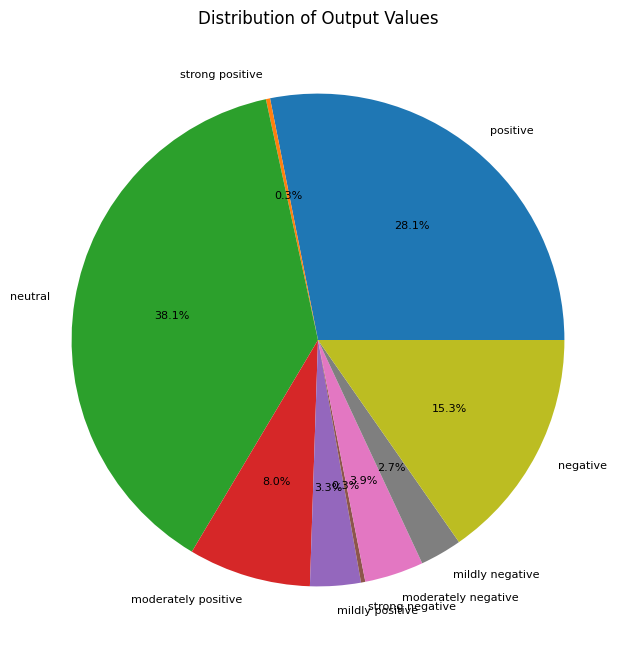

In [ ]:
# prompt: plot the dictionary class_counts_dict as a pie chart. Also font size be small

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(class_counts_dict.values(), labels=class_counts_dict.keys(), autopct="%1.1f%%", textprops={'fontsize': 8})
plt.title("Distribution of Output Values")
plt.show()


### Overall Bar chart

<ipython-input-7-3a889e2cd2fe>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = list(class_counts_dict.keys()), y = list(class_counts_dict.values()), palette = "Set3")


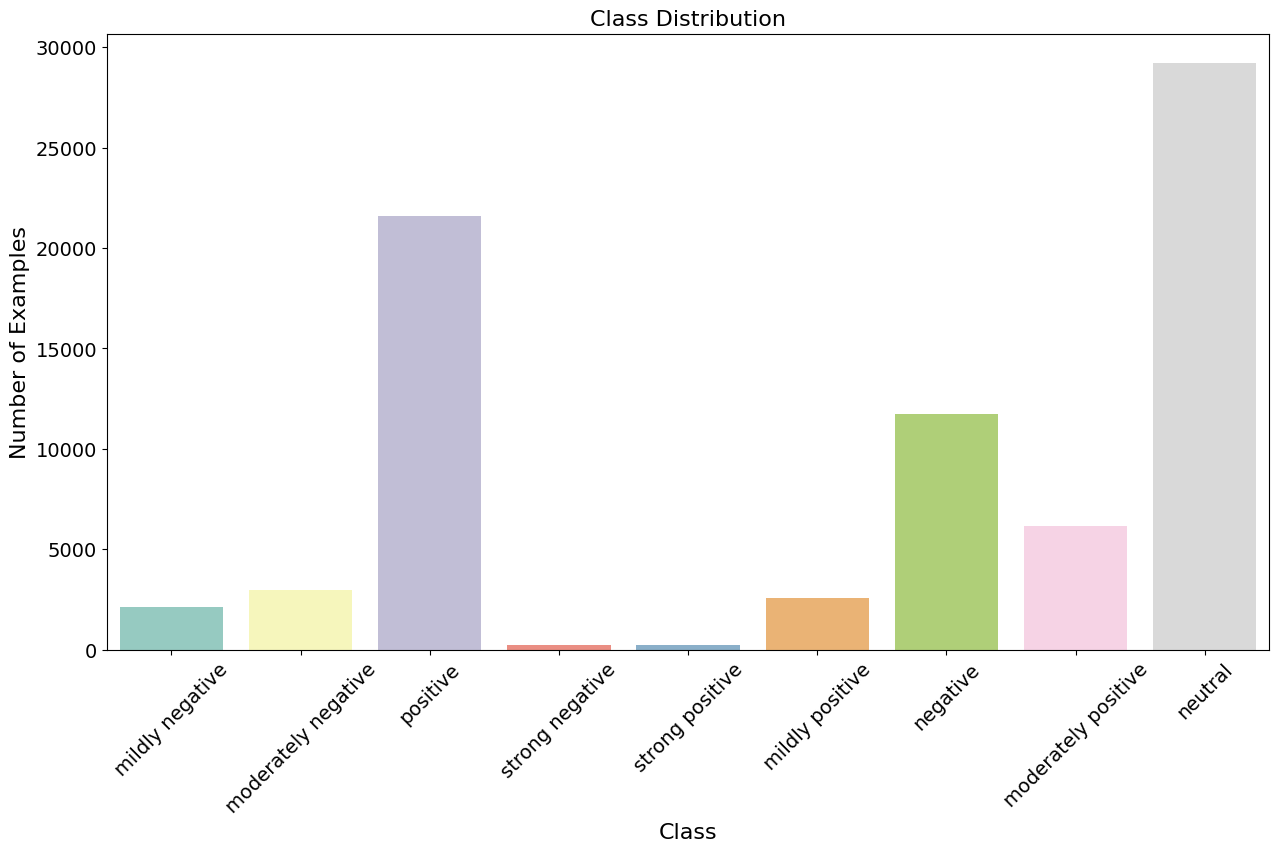

In [ ]:
# prompt: Plot the class_counts_dict dictionary. Increase the size of graph

import matplotlib.pyplot as plt
import seaborn as sns
# Plot the class_counts_dict dictionary. Increase the size of graph
plt.figure(figsize=(15,8))
sns.barplot(x = list(class_counts_dict.keys()), y = list(class_counts_dict.values()), palette = "Set3")
plt.title("Class Distribution", fontsize = 16)
plt.xlabel("Class", fontsize = 16)
plt.ylabel("Number of Examples", fontsize = 16)
plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()


## Split dataset

In [ ]:
fingpt_dataset_split = fingpt_dataset['train'].train_test_split(test_size=0.2,seed=42)

In [ ]:
fingpt_dataset_split

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'instruction'],
        num_rows: 61417
    })
    test: Dataset({
        features: ['input', 'output', 'instruction'],
        num_rows: 15355
    })
})

### TRAIN

In [ ]:
# prompt: code to count number of rows of dataset by class in column 'output'
class_counts_dict={}
for i, class_name in enumerate(class_counts):
  class_counts_dict[class_name] = len(fingpt_dataset_split['train'].filter(lambda example: example['output'] == class_name))
print(class_counts_dict)

Filter:   0%|          | 0/61417 [00:00<?, ? examples/s]

Filter:   0%|          | 0/61417 [00:00<?, ? examples/s]

Filter:   0%|          | 0/61417 [00:00<?, ? examples/s]

Filter:   0%|          | 0/61417 [00:00<?, ? examples/s]

Filter:   0%|          | 0/61417 [00:00<?, ? examples/s]

Filter:   0%|          | 0/61417 [00:00<?, ? examples/s]

Filter:   0%|          | 0/61417 [00:00<?, ? examples/s]

Filter:   0%|          | 0/61417 [00:00<?, ? examples/s]

Filter:   0%|          | 0/61417 [00:00<?, ? examples/s]

{'mildly negative': 1706, 'moderately negative': 2412, 'positive': 17277, 'strong negative': 176, 'strong positive': 170, 'mildly positive': 2021, 'negative': 9359, 'moderately positive': 4961, 'neutral': 23335}


#### Bar chart

<ipython-input-11-3a889e2cd2fe>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = list(class_counts_dict.keys()), y = list(class_counts_dict.values()), palette = "Set3")


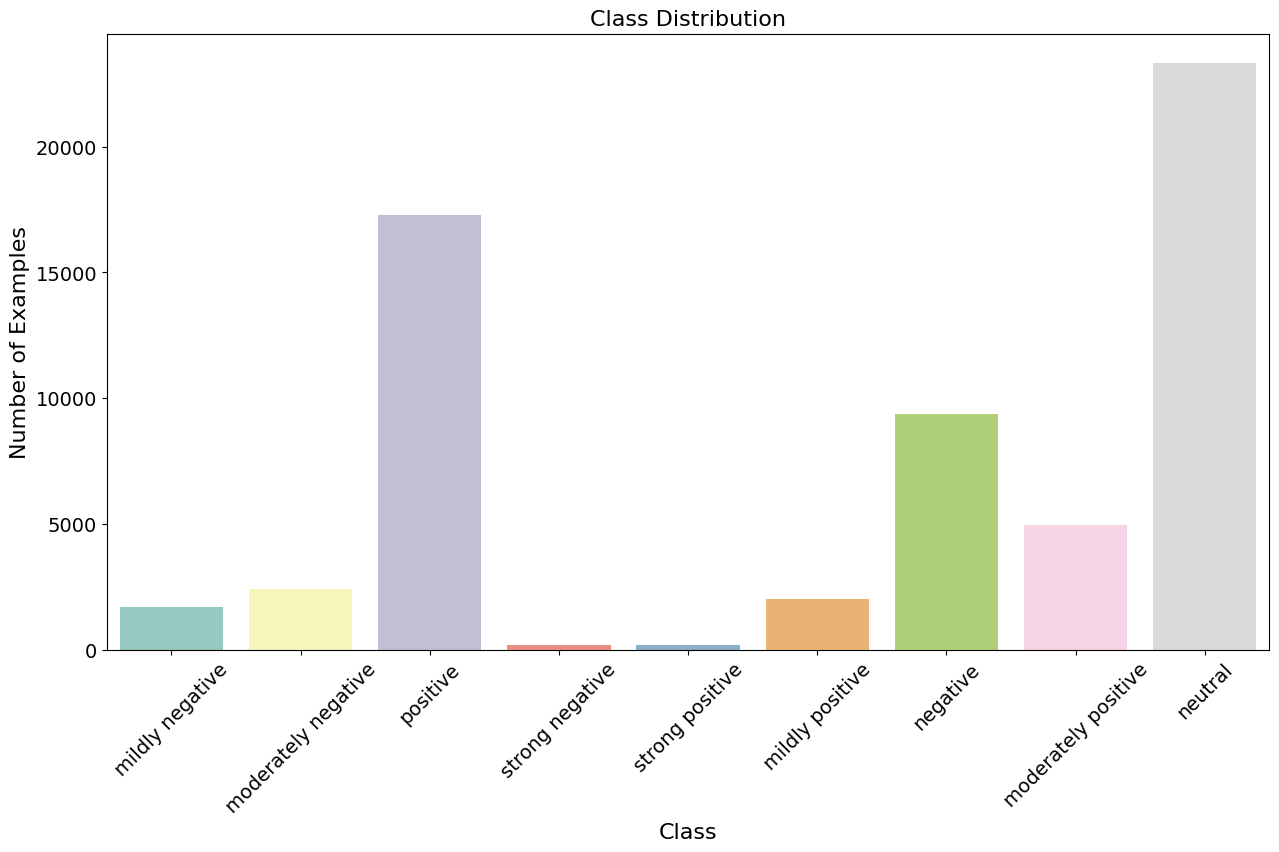

In [ ]:
# prompt: Plot the class_counts_dict dictionary. Increase the size of graph

import matplotlib.pyplot as plt
import seaborn as sns
# Plot the class_counts_dict dictionary. Increase the size of graph
plt.figure(figsize=(15,8))
sns.barplot(x = list(class_counts_dict.keys()), y = list(class_counts_dict.values()), palette = "Set3")
plt.title("Class Distribution", fontsize = 16)
plt.xlabel("Class", fontsize = 16)
plt.ylabel("Number of Examples", fontsize = 16)
plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()


#### Classwise percentage of samples

In [ ]:
d = {'positive': 28.130647866225967,
 'negative': 15.238451894426625,
 'neutral': 37.9943663806438,
 'strongly negative': 0.0,
 'strongly positive': 0.0,
 'moderately negative': 3.927251412475373,
 'moderately positive': 8.07756810003745,
 'mildly positive': 3.2906198609505513,
 'mildly negative': 2.7777325496198118}

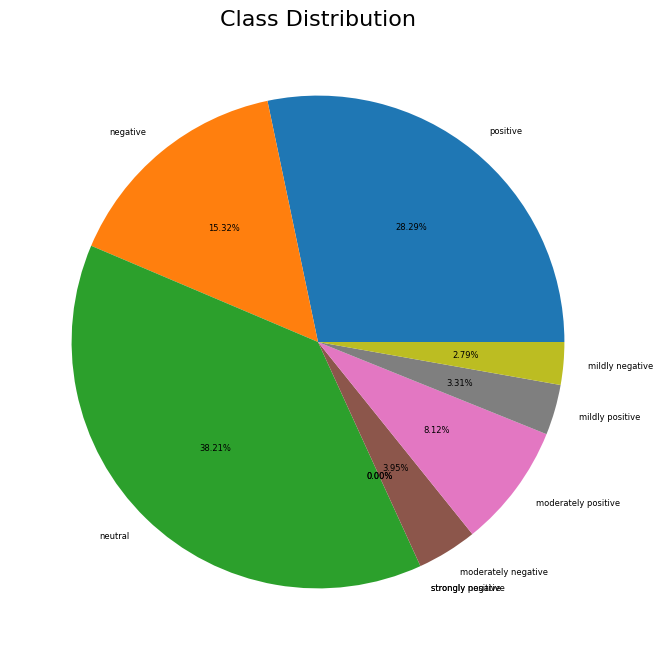

In [ ]:
# prompt: plot the dictionary d as a pie chart with small font

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.pie(d.values(), labels=d.keys(), autopct="%0.2f%%", textprops={'fontsize': 6})
plt.title("Class Distribution", fontsize=16)
plt.show()


In [ ]:
percent_class

{'positive': 28.130647866225967,
 'negative': 15.238451894426625,
 'neutral': 37.9943663806438,
 'strongly negative': 0.0,
 'strongly positive': 0.0,
 'moderately negative': 3.927251412475373,
 'moderately positive': 8.07756810003745,
 'mildly positive': 3.2906198609505513,
 'mildly negative': 2.7777325496198118}

###TEST

In [ ]:
fingpt_dataset_split

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'instruction'],
        num_rows: 61417
    })
    test: Dataset({
        features: ['input', 'output', 'instruction'],
        num_rows: 15355
    })
})

In [ ]:
count_dict ={
    "positive": 0,
    "negative": 0,
    "neutral": 0,
    'strongly negative':0,
    'strongly positive':0,
    'moderately negative':0,
    'moderately positive':0,
    'mildly negative':0,
    'mildly positive':0
}
for example in fingpt_dataset_split['test']:
  # print(example['output'])
  if example['output'] == 'negative':
    count_dict[example['output']] += 1
  elif example['output'] == 'positive':
    count_dict[example['output']] += 1
  elif example['output'] == 'strongly negative':
    count_dict[example['output']] += 1
  elif example['output'] == 'strongly positive':
    count_dict[example['output']] += 1
  elif example['output'] == 'moderately negative':
    count_dict[example['output']] += 1
  elif example['output'] == 'moderately positive':
    count_dict[example['output']] += 1
  elif example['output'] == 'mildly negative':
    count_dict[example['output']] += 1
  elif example['output'] == 'mildly positive':
    count_dict[example['output']] += 1
  elif example['output'] == 'neutral':
    count_dict[example['output']] += 1

In [ ]:
# train
percent_class=dict()
percent_class['positive'] = count_dict['positive'] / 61417 * 100
percent_class['negative'] = count_dict['negative'] / 61417* 100
percent_class['neutral'] = count_dict['neutral'] / 61417* 100
percent_class['strongly negative'] = count_dict['strongly negative'] / 61417* 100
percent_class['strongly positive'] = count_dict['strongly positive'] / 61417* 100
percent_class['moderately negative'] = count_dict['moderately negative'] / 61417* 100
percent_class['moderately positive'] = count_dict['moderately positive'] / 61417* 100
percent_class['mildly positive'] = count_dict['mildly positive'] / 61417* 100
percent_class['mildly negative'] = count_dict['mildly negative'] / 61417* 100

#### Classwise percentage of samples

In [ ]:
#TEST
# train
percent_class=dict()
percent_class['positive'] = count_dict['positive'] / 15355 * 100
percent_class['negative'] = count_dict['negative'] / 15355* 100
percent_class['neutral'] = count_dict['neutral'] / 15355* 100
percent_class['strongly negative'] = count_dict['strongly negative'] / 15355* 100
percent_class['strongly positive'] = count_dict['strongly positive'] / 15355* 100
percent_class['moderately negative'] = count_dict['moderately negative'] / 15355* 100
percent_class['moderately positive'] = count_dict['moderately positive'] / 15355* 100
percent_class['mildly positive'] = count_dict['mildly positive'] / 15355* 100
percent_class['mildly negative'] = count_dict['mildly negative'] / 15355* 100

In [ ]:
percent_class

{'positive': 28.075545424943016,
 'negative': 15.564962552914361,
 'neutral': 38.29371540214914,
 'strongly negative': 0.0,
 'strongly positive': 0.0,
 'moderately negative': 3.647020514490394,
 'moderately positive': 7.82806903288831,
 'mildly positive': 3.4321068056007813,
 'mildly negative': 2.6180397264734614}

In [ ]:
# prompt: code to count number of rows of dataset by class in column 'output'
class_counts_dict={}
for i, class_name in enumerate(class_counts):
  class_counts_dict[class_name] = len(fingpt_dataset_split['test'].filter(lambda example: example['output'] == class_name))
print(class_counts_dict)

{'mildly negative': 402, 'moderately negative': 560, 'positive': 4311, 'strong negative': 42, 'strong positive': 41, 'mildly positive': 527, 'negative': 2390, 'moderately positive': 1202, 'neutral': 5880}


#### Bar chart

<ipython-input-15-3a889e2cd2fe>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = list(class_counts_dict.keys()), y = list(class_counts_dict.values()), palette = "Set3")


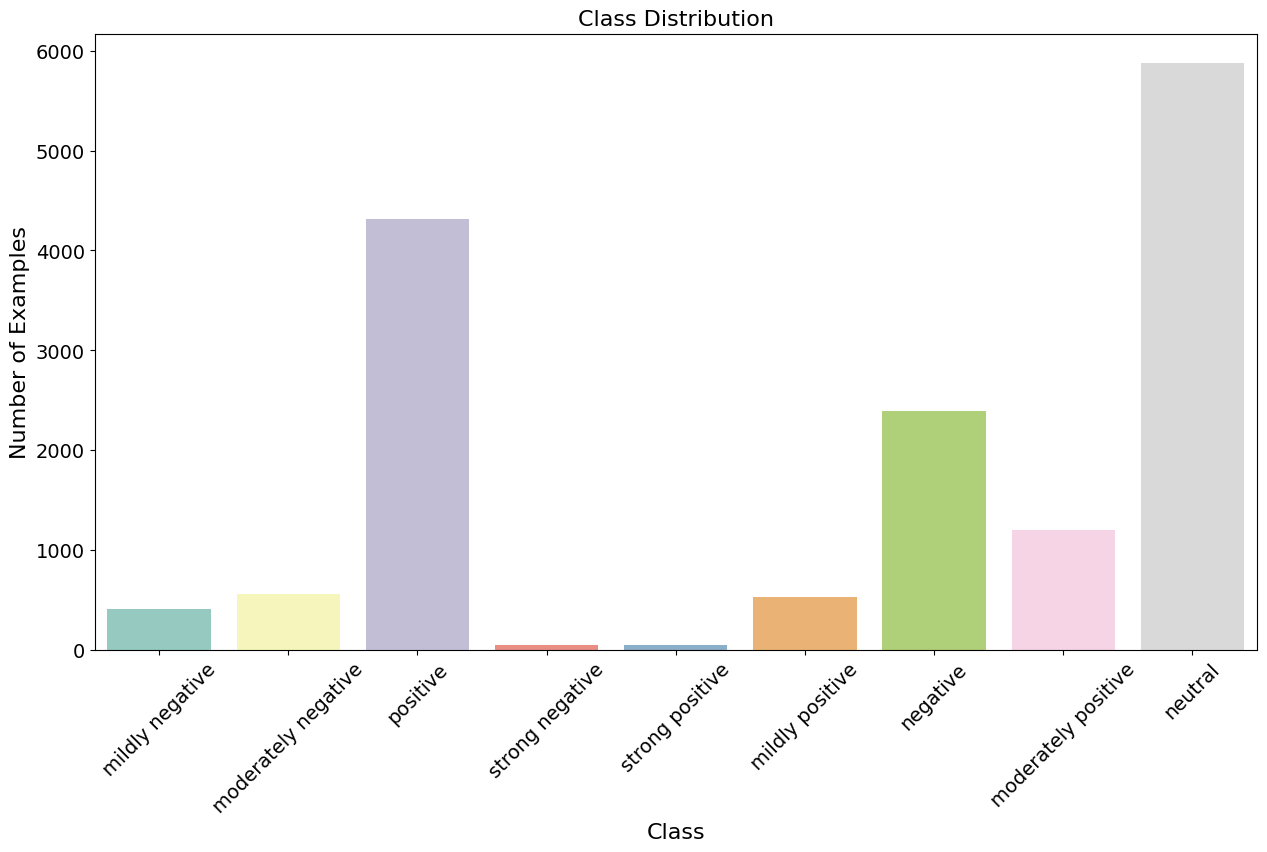

In [ ]:
# prompt: Plot the class_counts_dict dictionary. Increase the size of graph

import matplotlib.pyplot as plt
import seaborn as sns
# Plot the class_counts_dict dictionary. Increase the size of graph
plt.figure(figsize=(15,8))
sns.barplot(x = list(class_counts_dict.keys()), y = list(class_counts_dict.values()), palette = "Set3")
plt.title("Class Distribution", fontsize = 16)
plt.xlabel("Class", fontsize = 16)
plt.ylabel("Number of Examples", fontsize = 16)
plt.xticks(rotation = 45, fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()


In [ ]:
fingpt_dataset_train_split = fingpt_dataset_split['train'].train_test_split(test_size=0.2,seed=42)

In [ ]:
fingpt_dataset_train_split

DatasetDict({
    train: Dataset({
        features: ['input', 'output', 'instruction'],
        num_rows: 49133
    })
    test: Dataset({
        features: ['input', 'output', 'instruction'],
        num_rows: 12284
    })
})

In [ ]:
count_dict ={
    "positive": 0,
    "negative": 0,
    "neutral": 0,
    'strongly negative':0,
    'strongly positive':0,
    'moderately negative':0,
    'moderately positive':0,
    'mildly negative':0,
    'mildly positive':0
}
for example in fingpt_dataset_train_split['train']:
  # print(example['output'])
  if example['output'] == 'negative':
    count_dict[example['output']] += 1
  elif example['output'] == 'positive':
    count_dict[example['output']] += 1
  elif example['output'] == 'strongly negative':
    count_dict[example['output']] += 1
  elif example['output'] == 'strongly positive':
    count_dict[example['output']] += 1
  elif example['output'] == 'moderately negative':
    count_dict[example['output']] += 1
  elif example['output'] == 'moderately positive':
    count_dict[example['output']] += 1
  elif example['output'] == 'mildly negative':
    count_dict[example['output']] += 1
  elif example['output'] == 'mildly positive':
    count_dict[example['output']] += 1
  elif example['output'] == 'neutral':
    count_dict[example['output']] += 1

In [ ]:
#TEST
# train
percent_class=dict()
percent_class['positive'] = count_dict['positive'] / 49133 * 100
percent_class['negative'] = count_dict['negative'] / 49133* 100
percent_class['neutral'] = count_dict['neutral'] / 49133* 100
percent_class['strongly negative'] = count_dict['strongly negative'] / 49133* 100
percent_class['strongly positive'] = count_dict['strongly positive'] / 49133* 100
percent_class['moderately negative'] = count_dict['moderately negative'] / 49133* 100
percent_class['moderately positive'] = count_dict['moderately positive'] / 49133* 100
percent_class['mildly positive'] = count_dict['mildly positive'] / 49133* 100
percent_class['mildly negative'] = count_dict['mildly negative'] / 49133* 100

In [ ]:
percent_class

{'positive': 28.24374656544481,
 'negative': 15.18734862516028,
 'neutral': 37.84625404514277,
 'strongly negative': 0.0,
 'strongly positive': 0.0,
 'moderately negative': 3.9342193637677325,
 'moderately positive': 8.069932631836037,
 'mildly positive': 3.331772942828649,
 'mildly negative': 2.835161703946431}

# On Financial Phrase bank dataset


In [ ]:
from datasets import load_dataset

fpb_dataset = load_dataset("financial_phrasebank",'sentences_allagree')

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for financial_phrasebank contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/financial_phrasebank
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/2264 [00:00<?, ? examples/s]

In [ ]:
fpb_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 2264
    })
})

In [ ]:
id2label = {0: 'negative', 1: 'neutral', 2: 'positive'}
label2id = {'negative': 0, 'neutral': 1, 'positive': 2}
sent=[]
for example in fpb_dataset['train']:
  sent.append(id2label[example['label']])

fpb_dataset['train'] = fpb_dataset['train'].add_column('sentiments',sent)

## Class count

In [ ]:
# prompt: find number of unique values in a categorical column 'output' of dataset

class_counts =set(fpb_dataset['train']["sentiments"])
print(f"Number of unique values in 'output' column: {len(class_counts)}")

# Print the unique values
print(class_counts)


Number of unique values in 'output' column: 3
{'positive', 'negative', 'neutral'}


## Class wise sample count

In [ ]:
# prompt: code to count number of rows of dataset by class in column 'output'
class_counts_dict={}
for i, class_name in enumerate(class_counts):
  class_counts_dict[class_name] = len(fpb_dataset['train'].filter(lambda example: example['sentiments'] == class_name))
print(class_counts_dict)

Filter:   0%|          | 0/2264 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2264 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2264 [00:00<?, ? examples/s]

{'positive': 570, 'negative': 303, 'neutral': 1391}


### Overall Pie chart

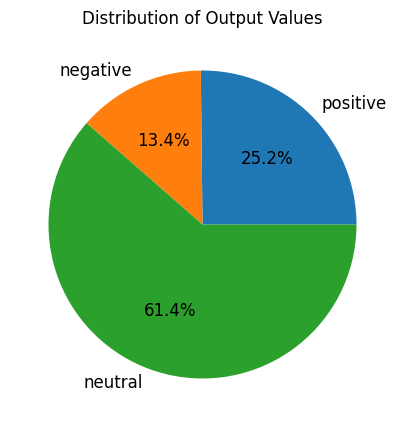

In [ ]:
# prompt: plot the dictionary class_counts_dict as a pie chart. Also font size be small

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.pie(class_counts_dict.values(), labels=class_counts_dict.keys(), autopct="%1.1f%%", textprops={'fontsize': 12})
plt.title("Distribution of Output Values")
plt.show()


### Overall Bar chart

<ipython-input-19-9a08a0c26b1e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = list(class_counts_dict.keys()), y = list(class_counts_dict.values()), palette = "Set3")


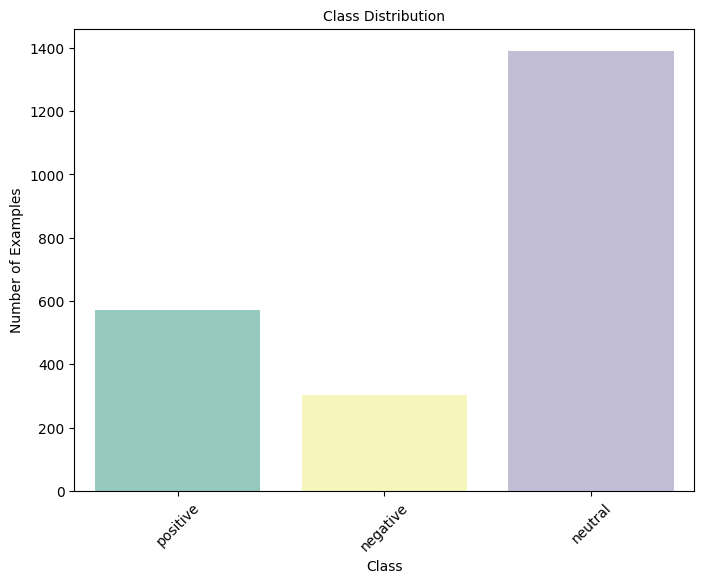

In [ ]:
# prompt: Plot the class_counts_dict dictionary. Increase the size of graph

import matplotlib.pyplot as plt
import seaborn as sns
# Plot the class_counts_dict dictionary. Increase the size of graph
plt.figure(figsize=(8,6))
sns.barplot(x = list(class_counts_dict.keys()), y = list(class_counts_dict.values()), palette = "Set3")
plt.title("Class Distribution", fontsize = 10)
plt.xlabel("Class", fontsize = 10)
plt.ylabel("Number of Examples", fontsize = 10)
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()


# On Financial news headlines dataset


In [ ]:
from datasets import load_dataset

news_dataset = load_dataset("steve1989/financial_news_headlines")

Generating train split:   0%|          | 0/13031 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2793 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2793 [00:00<?, ? examples/s]

In [ ]:
news_dataset

DatasetDict({
    train: Dataset({
        features: ['Headlines', 'sentiment_label', '__index_level_0__'],
        num_rows: 13031
    })
    validation: Dataset({
        features: ['Headlines', 'sentiment_label', '__index_level_0__'],
        num_rows: 2793
    })
    test: Dataset({
        features: ['Headlines', 'sentiment_label', '__index_level_0__'],
        num_rows: 2793
    })
})

## Class count

In [ ]:
# prompt: find number of unique values in a categorical column 'output' of dataset

class_counts =set(news_dataset['train']["sentiment_label"])
print(f"Number of unique values in 'output' column: {len(class_counts)}")

# Print the unique values
print(class_counts)


Number of unique values in 'output' column: 3
{'Negative', 'Positive', 'Neutral'}


## Class wise sample count

In [ ]:
from datasets import concatenate_datasets

In [ ]:
# prompt: code to count number of rows of dataset by class in column 'output'
class_counts_dict={}
for i, class_name in enumerate(class_counts):
  class_counts_dict[class_name] = len(concatenate_datasets([news_dataset['train'],news_dataset['test'],news_dataset['validation']]).filter(lambda example: example['sentiment_label'] == class_name))
print(class_counts_dict)

Filter:   0%|          | 0/18617 [00:00<?, ? examples/s]

Filter:   0%|          | 0/18617 [00:00<?, ? examples/s]

Filter:   0%|          | 0/18617 [00:00<?, ? examples/s]

{'Negative': 6130, 'Positive': 6364, 'Neutral': 6123}


### Overall Pie chart

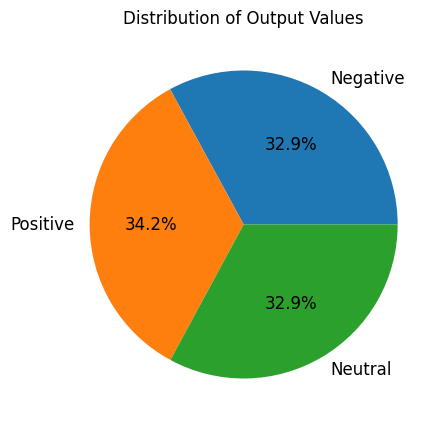

In [ ]:
# prompt: plot the dictionary class_counts_dict as a pie chart. Also font size be small

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.pie(class_counts_dict.values(), labels=class_counts_dict.keys(), autopct="%1.1f%%", textprops={'fontsize': 12})
plt.title("Distribution of Output Values")
plt.show()


### Overall Bar chart

<ipython-input-31-9a08a0c26b1e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = list(class_counts_dict.keys()), y = list(class_counts_dict.values()), palette = "Set3")


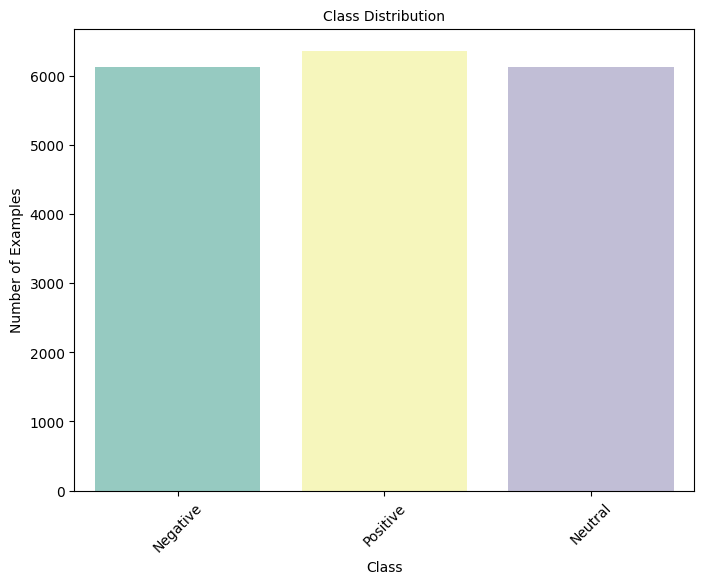

In [ ]:
# prompt: Plot the class_counts_dict dictionary. Increase the size of graph

import matplotlib.pyplot as plt
import seaborn as sns
# Plot the class_counts_dict dictionary. Increase the size of graph
plt.figure(figsize=(8,6))
sns.barplot(x = list(class_counts_dict.keys()), y = list(class_counts_dict.values()), palette = "Set3")
plt.title("Class Distribution", fontsize = 10)
plt.xlabel("Class", fontsize = 10)
plt.ylabel("Number of Examples", fontsize = 10)
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()


# Plot of various LLMs

In [ ]:
x=['Finbert','Twitter-roberta-base','da-sentiment-base','Flan T5-base','Flan T5-xl','InternLM','mistral','FinGPT']
y=[0.2,0.2,0.11,.248,2.85,7,7.24,12.9]
z=['text-classification','text-classification','text-classification','text-2text generation','text-2text generation','text-generation','text-generation','text-generation']

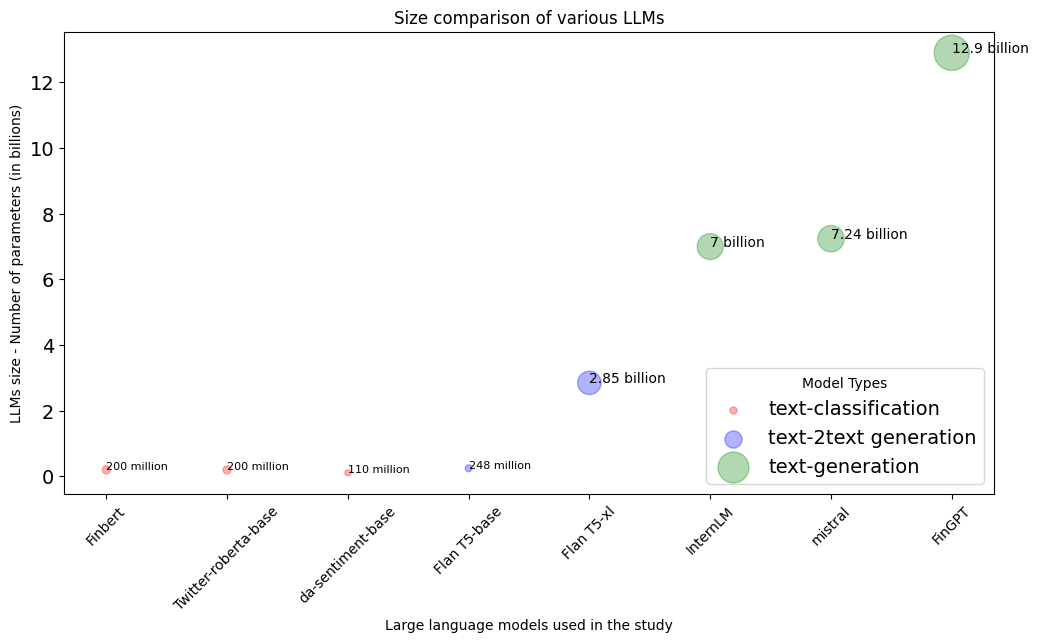

In [ ]:
# prompt: plot a scatter chart of the x and y with points proportionate to its value

import matplotlib.pyplot as plt

# Create a scatter plot with varying point sizes based on values in `y`
# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create a list of areas proportional to the values in y
areas1 = [i * 170 for i in y[:3]]
areas2 = [i * 100 for i in y[3:5]]
areas3 = [i * 50 for i in y[5:]]
colors = {'text-classification':'red','text-2text generation':'blue','text-generation':'green'}

# Plot the scatter plot with varying point sizes
# plt.scatter(x, y, s=areas, alpha=0.3, c=[colors[i] for i in z])
plt.scatter(x[:3], y[:3], s=areas1, alpha=0.3, c='red',label='text-classification')
plt.scatter(x[3:5], y[3:5], s=areas2, alpha=0.3, c='blue',label='text-2text generation')
plt.scatter(x[5:], y[5:], s=areas3, alpha=0.3, c='green',label='text-generation')

plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 14)

for i, txt in enumerate(y):
    if txt < 1:
      txt = int(txt * 1000)
      ax.annotate(str(txt)+" million", (x[i], y[i]), fontsize=8)
    else:
      ax.annotate(str(txt)+" billion", (x[i], y[i]))


# Set title and labels
plt.title("Size comparison of various LLMs")
plt.xlabel("Large language models used in the study")
plt.ylabel("LLMs size - Number of parameters (in billions)")
# plt.legend(z)
plt.legend(loc="lower right",title="Model Types",  fontsize=14) #fontsize='x-small',
# Show the plot
plt.show()


#Comparison of classification model accuracy and F1 score

## Classification Models

In [ ]:
class_models = ['FinBert','twitter-roberta-base-sentiment','da-sentiment-base']

# class_acc_before = [.01,0.70,.56]
# class_f1_before = [.01,0.55,.56]

# x_axis = ['Financial phrasebank','financial news headlines','fingpt sentiment train']

finbert_acc_before={'Financial phrasebank':.01, 'financial news headlines':0.25, 'fingpt sentiment train':0.095}
twitter_roberta_before = {'Financial phrasebank':0.70,'financial news headlines':0.53,'fingpt sentiment train':.05}
da_sentiment_base_before={'Financial phrasebank':.56,'financial news headlines':0.35,'fingpt sentiment train': 0.01}


metrics  = {"accuracy":[finbert_acc_before,twitter_roberta_before,da_sentiment_base_before],"F1 score":[finbert_f1_before,twitter_roberta_f1_before,da_sentiment_base_f1_before]}

# class_acc_after = [.98,0.97,.87]
# class_f1_after = [.98,0.96,.81]


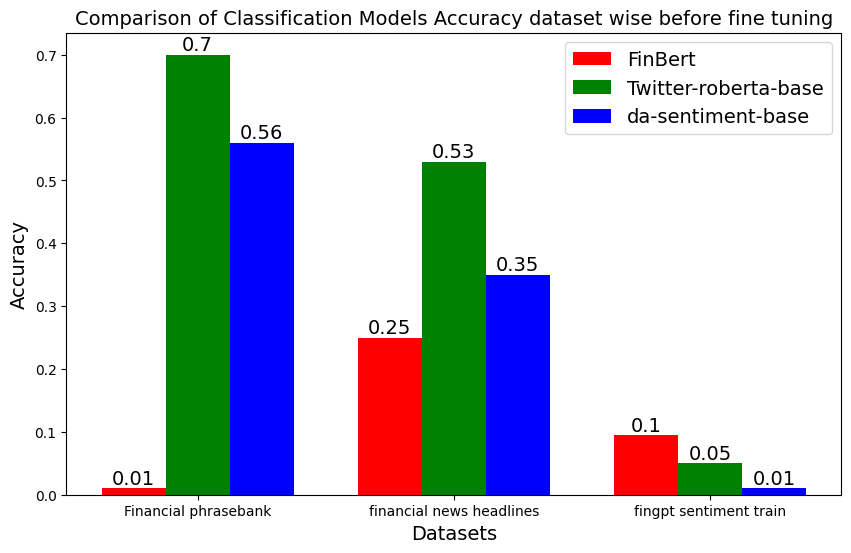

In [ ]:

import matplotlib.pyplot as plt
x_axis = ['Financial phrasebank','financial news headlines','fingpt sentiment train']
finbert_acc_before = {'Financial phrasebank':.01, 'financial news headlines':0.25, 'fingpt sentiment train':0.095}
twitter_roberta_before = {'Financial phrasebank':0.70,'financial news headlines':0.53,'fingpt sentiment train':.05}
da_sentiment_base_before = {'Financial phrasebank':.56,'financial news headlines':0.35,'fingpt sentiment train': 0.01}

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define width of each bar
bar_width = 0.25

# Define x-axis positions for each set of bars
x_pos = [i for i in range(len(x_axis))]


# Create bars for each model - Accuracy
ax.bar(x_pos, [finbert_acc_before[i] for i in x_axis], bar_width, label='FinBert', color='r')
ax.bar([i + bar_width for i in x_pos], [twitter_roberta_before[i] for i in x_axis], bar_width, label='Twitter-roberta-base', color='g')
ax.bar([i + 2*bar_width for i in x_pos], [da_sentiment_base_before[i] for i in x_axis], bar_width, label='da-sentiment-base', color='b')

# Add x-axis labels
ax.set_xticks([i + bar_width for i in x_pos])
ax.set_xticklabels(x_axis)

# Add title and labels
ax.set_title('Comparison of Classification Models Accuracy dataset wise before fine tuning', fontsize=14)
ax.set_xlabel('Datasets', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)


for i, val in enumerate(finbert_acc_before.values()):
  ax.annotate(str(round(val,2)), xy=(i, val), ha='center', va='bottom', fontsize=14)
for i, val in enumerate(twitter_roberta_before.values()):
  ax.annotate(str(round(val,2)), xy=(i+bar_width, val), ha='center', va='bottom', fontsize=14)
for i, val in enumerate(da_sentiment_base_before.values()):
  ax.annotate(str(round(val,2)), xy=(i+2*bar_width, val), ha='center', va='bottom', fontsize=14)

# Add legend
ax.legend(loc='upper right', fontsize=14)

# Show the plot
plt.show()

In [ ]:

finbert_f1_before={'Financial phrasebank':.01, 'financial news headlines':0.24, 'fingpt sentiment train':0.033}
twitter_roberta_f1_before = {'Financial phrasebank':0.55,'financial news headlines':0.47,'fingpt sentiment train':.02}
da_sentiment_base_f1_before={'Financial phrasebank':.56,'financial news headlines':0.35,'fingpt sentiment train': 0.01}

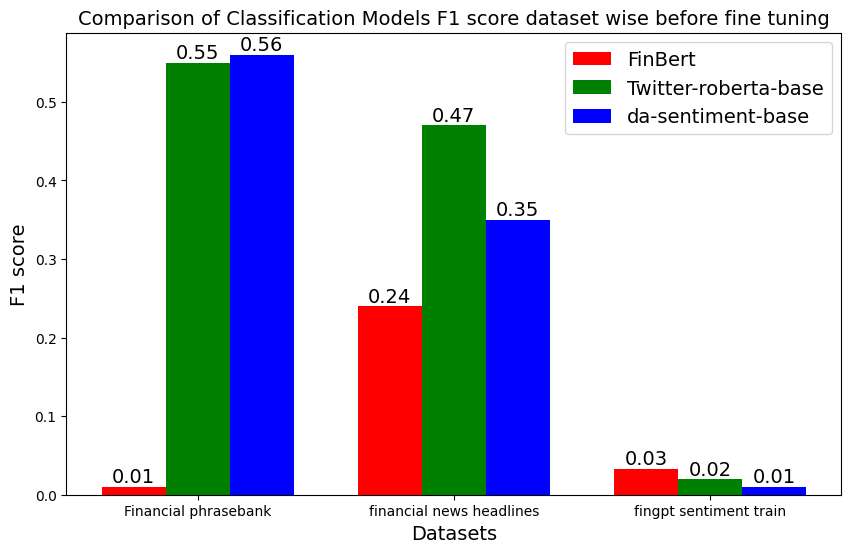

In [ ]:
# prompt: Plot a bar chart using the dictionaries finbert_f1_before,twitter_roberta_f1_before,da_sentiment_base_f1_before in a single graph. Also annotate data points

import matplotlib.pyplot as plt
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define width of each bar
bar_width = 0.25

# Define x-axis positions for each set of bars
x_pos = [i for i in range(len(x_axis))]


# Create bars for each model - Accuracy
ax.bar(x_pos, [finbert_f1_before[i] for i in x_axis], bar_width, label='FinBert', color='r')
ax.bar([i + bar_width for i in x_pos], [twitter_roberta_f1_before[i] for i in x_axis], bar_width, label='Twitter-roberta-base', color='g')
ax.bar([i + 2*bar_width for i in x_pos], [da_sentiment_base_f1_before[i] for i in x_axis], bar_width, label='da-sentiment-base', color='b')

# Add x-axis labels
ax.set_xticks([i + bar_width for i in x_pos])
ax.set_xticklabels(x_axis)

# Add title and labels
ax.set_title('Comparison of Classification Models F1 score dataset wise before fine tuning', fontsize=14)
ax.set_xlabel('Datasets', fontsize=14)
ax.set_ylabel('F1 score', fontsize=14)

for i, val in enumerate(finbert_f1_before.values()):
  ax.annotate(str(round(val,2)), xy=(i, val), ha='center', va='bottom', fontsize=14)
for i, val in enumerate(twitter_roberta_f1_before.values()):
  ax.annotate(str(round(val,2)), xy=(i+bar_width, val), ha='center', va='bottom', fontsize=14)
for i, val in enumerate(da_sentiment_base_f1_before.values()):
  ax.annotate(str(round(val,2)), xy=(i+2*bar_width, val), ha='center', va='bottom', fontsize=14)

# Add legend
ax.legend(loc='upper right', fontsize=14)

# Show the plot
plt.show()


## Text generation models

In [ ]:
class_models = ['FlanT5-base','FlanT5-xl']

# class_acc_before = [.01,0.70,.56]
# class_f1_before = [.01,0.55,.56]

# x_axis = ['Financial phrasebank','financial news headlines','fingpt sentiment train']

Flan_T5base_acc_before={'Financial phrasebank':.34, 'financial news headlines':0.44, 'fingpt sentiment train':0.37}
Flan_T5_xl_before = {'Financial phrasebank':0.86,'financial news headlines':0.58,'fingpt sentiment train':.28}


# metrics  = {"accuracy":[finbert_acc_before,twitter_roberta_before,da_sentiment_base_before],"F1 score":[finbert_f1_before,twitter_roberta_f1_before,da_sentiment_base_f1_before]}

# class_acc_after = [.98,0.97,.87]
# class_f1_after = [.98,0.96,.81]


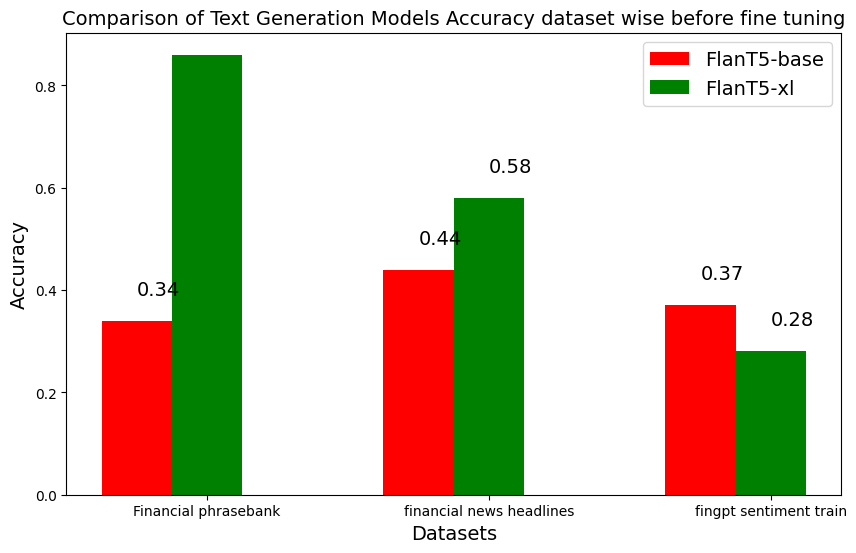

In [ ]:
# prompt: Plot a bar chart using the above dictionary in a single graph. Also annotate for data point

import matplotlib.pyplot as plt
x_axis = ['Financial phrasebank','financial news headlines','fingpt sentiment train']
Flan_T5base_acc_before={'Financial phrasebank':.34, 'financial news headlines':0.44, 'fingpt sentiment train':0.37}
Flan_T5_xl_before = {'Financial phrasebank':0.86,'financial news headlines':0.58,'fingpt sentiment train':.28}


# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define width of each bar
bar_width = 0.25

# Define x-axis positions for each set of bars
x_pos = [i for i in range(len(x_axis))]


# Create bars for each model - Accuracy
ax.bar(x_pos, [Flan_T5base_acc_before[i] for i in x_axis], bar_width, label='FlanT5-base', color='r')
ax.bar([i + bar_width for i in x_pos], [Flan_T5_xl_before[i] for i in x_axis], bar_width, label='FlanT5-xl', color='g')

# Add x-axis labels
ax.set_xticks([i + bar_width for i in x_pos])
ax.set_xticklabels(x_axis)

# Add title and labels
ax.set_title('Comparison of Text Generation Models Accuracy dataset wise before fine tuning', fontsize=14)
ax.set_xlabel('Datasets', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

# Add legend
ax.legend(loc='upper right', fontsize=14)

# Add annotations
for i, v in enumerate(Flan_T5base_acc_before.values()):
    ax.annotate(str(v), xy=(i, v + 0.05), fontsize=14)
for i, v in enumerate(Flan_T5_xl_before.values()):
    ax.annotate(str(v), xy=(i + bar_width, v + 0.05), fontsize=14)

# Show the plot
plt.show()


In [ ]:
Flan_T5base_f1_before={'Financial phrasebank':.34, 'financial news headlines':0.44, 'fingpt sentiment train':0.37}
Flan_T5_xl_f1_before = {'Financial phrasebank':0.86,'financial news headlines':0.58,'fingpt sentiment train':.28}

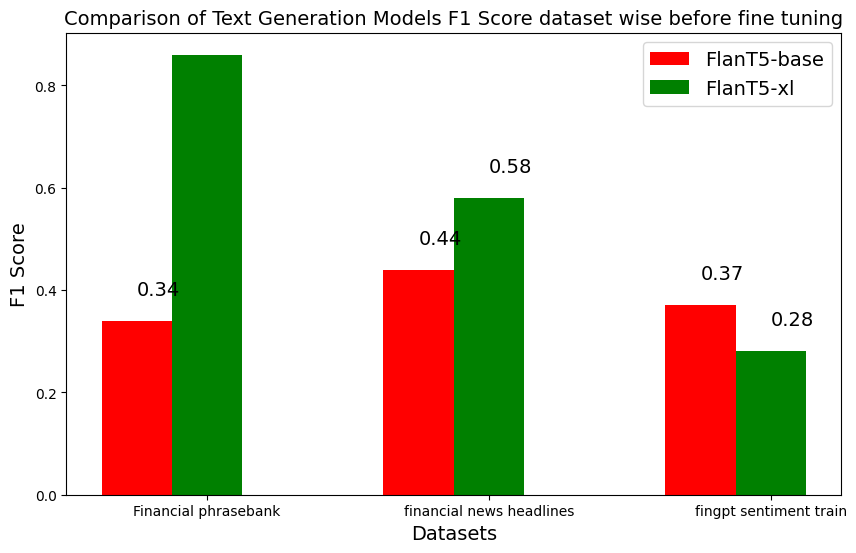

In [ ]:
# prompt: Plot a bar chart using the above dictionary in a single graph. Also annotate data point

import matplotlib.pyplot as plt
x_axis = list(Flan_T5base_f1_before.keys())
y_axis1 = list(Flan_T5base_f1_before.values())
y_axis2 = list(Flan_T5_xl_f1_before.values())

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define width of each bar
bar_width = 0.25

# Define x-axis positions for each set of bars
x_pos = [i for i in range(len(x_axis))]

# Create bars for each model - Accuracy
ax.bar(x_pos, y_axis1, bar_width, label='FlanT5-base', color='r')
ax.bar([i + bar_width for i in x_pos], y_axis2, bar_width, label='FlanT5-xl', color='g')

# Add x-axis labels
ax.set_xticks([i + bar_width for i in x_pos])
ax.set_xticklabels(x_axis)

# Add title and labels
ax.set_title('Comparison of Text Generation Models F1 Score dataset wise before fine tuning', fontsize=14)
ax.set_xlabel('Datasets', fontsize=14)
ax.set_ylabel('F1 Score', fontsize=14)

# Add legend
ax.legend(loc='upper right', fontsize=14)

# Add annotations
for i, v in enumerate(y_axis1):
    ax.annotate(str(v), xy=(i, v + 0.05), fontsize=14)
for i, v in enumerate(y_axis2):
    ax.annotate(str(v), xy=(i + bar_width, v + 0.05), fontsize=14)

# Show the plot
plt.show()


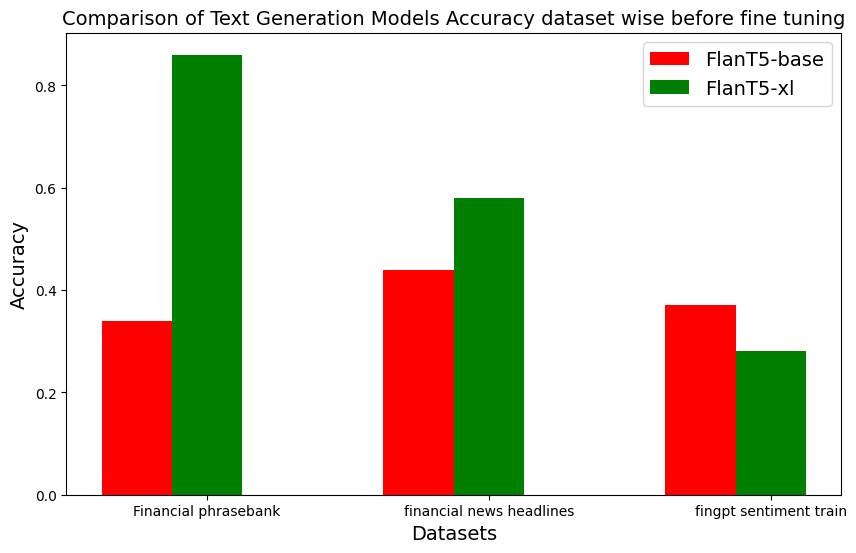

In [ ]:
# prompt: Plot a bar chart using the above dictionary in a single graph

import matplotlib.pyplot as plt
x_axis = list(Flan_T5base_f1_before.keys())
Flan_T5base_f1_before = list(Flan_T5base_f1_before.values())
Flan_T5_xl_f1_before = list(Flan_T5_xl_f1_before.values())

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define width of each bar
bar_width = 0.25

# Define x-axis positions for each set of bars
x_pos = [i for i in range(len(x_axis))]


# Create bars for each model - Accuracy
ax.bar(x_pos, Flan_T5base_f1_before, bar_width, label='FlanT5-base', color='r')
ax.bar([i + bar_width for i in x_pos], Flan_T5_xl_f1_before, bar_width, label='FlanT5-xl', color='g')


# Add x-axis labels
ax.set_xticks([i + bar_width for i in x_pos])
ax.set_xticklabels(x_axis)

# Add title and labels
ax.set_title('Comparison of Text Generation Models Accuracy dataset wise before fine tuning', fontsize=14)
ax.set_xlabel('Datasets', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

# Add legend
ax.legend(loc='upper right', fontsize=14)

# Show the plot
plt.show()


## Text2Text generation models

In [ ]:
FinGPT_acc_before={'Financial phrasebank':0.0, 'financial news headlines':0.42, 'fingpt sentiment train':0.16}
InternLM_acc_before = {'Financial phrasebank':0.87,'financial news headlines':0.59,'fingpt sentiment train':.35}
Mistral_acc_before = {'Financial phrasebank':0.88,'financial news headlines':0.55,'fingpt sentiment train':0.0}

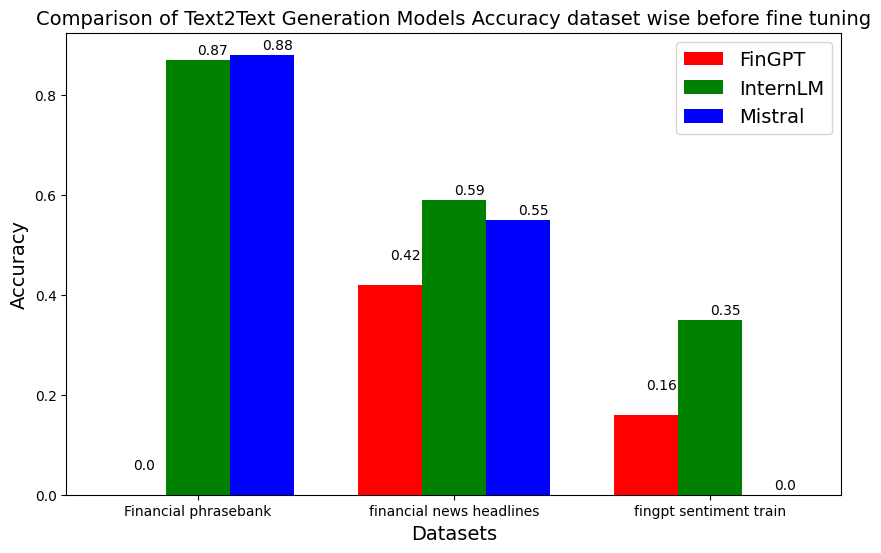

In [ ]:
# prompt: Plot a bar chart using the dictionary FinGPT_acc_before, InternLM_acc_before, Mistral_acc_before in a single graph. Also annotate data point

import matplotlib.pyplot as plt
x_axis = list(FinGPT_acc_before.keys())
FinGPT_acc_before = list(FinGPT_acc_before.values())
InternLM_acc_before = list(InternLM_acc_before.values())
Mistral_acc_before = list(Mistral_acc_before.values())

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define width of each bar
bar_width = 0.25

# Define x-axis positions for each set of bars
x_pos = [i for i in range(len(x_axis))]


# Create bars for each model - Accuracy
ax.bar(x_pos, FinGPT_acc_before, bar_width, label='FinGPT', color='r')
ax.bar([i + bar_width for i in x_pos], InternLM_acc_before, bar_width, label='InternLM', color='g')
ax.bar([i + 2*bar_width for i in x_pos], Mistral_acc_before, bar_width, label='Mistral', color='b')

# Add x-axis labels
ax.set_xticks([i + bar_width for i in x_pos])
ax.set_xticklabels(x_axis)

# Add title and labels
ax.set_title('Comparison of Text2Text Generation Models Accuracy dataset wise before fine tuning', fontsize=14)
ax.set_xlabel('Datasets', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

# Add legend
ax.legend(loc='upper right', fontsize=14)

# Add annotations
for i, v in enumerate(FinGPT_acc_before):
    ax.annotate(str(v), xy=(i, v + 0.05), fontsize=10)
for i, v in enumerate(InternLM_acc_before):
    ax.annotate(str(v), xy=(i + bar_width, v + 0.01), fontsize=10)
for i, v in enumerate(Mistral_acc_before):
    ax.annotate(str(v), xy=(i + 2*bar_width, v + 0.01), fontsize=10)

# Show the plot
plt.show()


In [ ]:
FinGPT_f1_before={'Financial phrasebank':0.0, 'financial news headlines':0.42, 'fingpt sentiment train':0.05}
InternLM_f1_before = {'Financial phrasebank':0.86,'financial news headlines':0.56,'fingpt sentiment train':.35}
Mistral_f1_before = {'Financial phrasebank':0.88,'financial news headlines':0.55,'fingpt sentiment train':0.0}

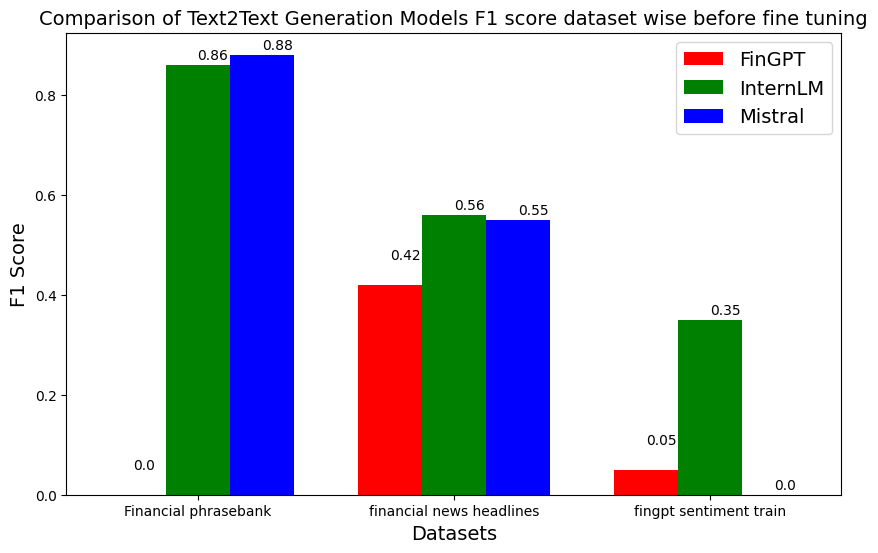

In [ ]:
# prompt: Plot a bar chart using the dictionary FinGPT_f1_before, InternLM_f1_before, Mistral_f1_beforein a single graph. Also annotate data point

import matplotlib.pyplot as plt
x_axis = list(FinGPT_f1_before.keys())
FinGPT_f1_before = list(FinGPT_f1_before.values())
InternLM_f1_before = list(InternLM_f1_before.values())
Mistral_f1_before = list(Mistral_f1_before.values())

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define width of each bar
bar_width = 0.25

# Define x-axis positions for each set of bars
x_pos = [i for i in range(len(x_axis))]


# Create bars for each model - Accuracy
ax.bar(x_pos, FinGPT_f1_before, bar_width, label='FinGPT', color='r')
ax.bar([i + bar_width for i in x_pos], InternLM_f1_before, bar_width, label='InternLM', color='g')
ax.bar([i + 2*bar_width for i in x_pos], Mistral_f1_before, bar_width, label='Mistral', color='b')

# Add x-axis labels
ax.set_xticks([i + bar_width for i in x_pos])
ax.set_xticklabels(x_axis)

# Add title and labels
ax.set_title('Comparison of Text2Text Generation Models F1 score dataset wise before fine tuning', fontsize=14)
ax.set_xlabel('Datasets', fontsize=14)
ax.set_ylabel('F1 Score', fontsize=14)

# Add legend
ax.legend(loc='upper right', fontsize=14)

# Add annotations
for i, v in enumerate(FinGPT_f1_before):
    ax.annotate(str(v), xy=(i, v + 0.05), fontsize=10)
for i, v in enumerate(InternLM_f1_before):
    ax.annotate(str(v), xy=(i + bar_width, v + 0.01), fontsize=10)
for i, v in enumerate(Mistral_f1_before):
    ax.annotate(str(v), xy=(i + 2*bar_width, v + 0.01), fontsize=10)

# Show the plot
plt.show()


# After fine tuning

## Classification Models

In [ ]:
class_models = ['FinBert','twitter-roberta-base-sentiment','da-sentiment-base']

# class_acc_before = [.01,0.70,.56]
# class_f1_before = [.01,0.55,.56]

# x_axis = ['Financial phrasebank','financial news headlines','fingpt sentiment train']

finbert_acc_after={'Financial phrasebank':.99, 'financial news headlines':0.71, 'fingpt sentiment train':0.89}
twitter_roberta_after = {'Financial phrasebank':0.97,'financial news headlines':0.75,'fingpt sentiment train':.89}
da_sentiment_base_after={'Financial phrasebank':.96,'financial news headlines':0.73,'fingpt sentiment train': 0.87}


# metrics  = {"accuracy":[finbert_acc_after,twitter_roberta_after,da_sentiment_base_after],"F1 score":[finbert_f1_before,twitter_roberta_f1_before,da_sentiment_base_f1_before]}

# class_acc_after = [.98,0.97,.87]
# class_f1_after = [.98,0.96,.81]


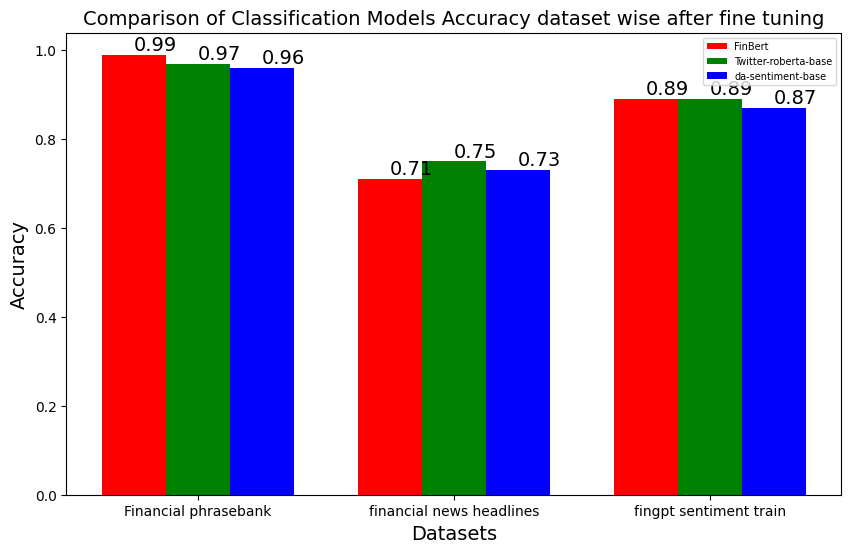

In [ ]:
# prompt: Plot a bar chart using the dictionaries finbert_acc_after,twitter_roberta_after,da_sentiment_base_after in a single graph. Also annotate data points

import matplotlib.pyplot as plt
x_axis = ['Financial phrasebank','financial news headlines','fingpt sentiment train']
finbert_acc_after = {'Financial phrasebank':.99, 'financial news headlines':0.71, 'fingpt sentiment train':0.89}
twitter_roberta_after = {'Financial phrasebank':0.97,'financial news headlines':0.75,'fingpt sentiment train':.89}
da_sentiment_base_after = {'Financial phrasebank':.96,'financial news headlines':0.73,'fingpt sentiment train': 0.87}

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define width of each bar
bar_width = 0.25

# Define x-axis positions for each set of bars
x_pos = [i for i in range(len(x_axis))]


# Create bars for each model - Accuracy
ax.bar(x_pos, [finbert_acc_after[i] for i in x_axis], bar_width, label='FinBert', color='r')
ax.bar([i + bar_width for i in x_pos], [twitter_roberta_after[i] for i in x_axis], bar_width, label='Twitter-roberta-base', color='g')
ax.bar([i + 2*bar_width for i in x_pos], [da_sentiment_base_after[i] for i in x_axis], bar_width, label='da-sentiment-base', color='b')

# Add x-axis labels
ax.set_xticks([i + bar_width for i in x_pos])
ax.set_xticklabels(x_axis)

# Add title and labels
ax.set_title('Comparison of Classification Models Accuracy dataset wise after fine tuning', fontsize=14)
ax.set_xlabel('Datasets', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

# Add legend
ax.legend(loc='upper right', fontsize=7)

# Add annotations
for i, v in enumerate(finbert_acc_after.values()):
    ax.annotate(str(v), xy=(i, v + 0.01), fontsize=14)
for i, v in enumerate(twitter_roberta_after.values()):
    ax.annotate(str(v), xy=(i + bar_width, v + 0.01), fontsize=14)
for i, v in enumerate(da_sentiment_base_after.values()):
    ax.annotate(str(v), xy=(i + 2*bar_width, v + 0.01), fontsize=14)

# Show the plot
plt.show()


In [ ]:
finbert_f1_after={'Financial phrasebank':.98, 'financial news headlines':0.70, 'fingpt sentiment train':0.51}
twitter_roberta_f1_after = {'Financial phrasebank':0.96,'financial news headlines':0.73,'fingpt sentiment train':.52}
da_sentiment_base_f1_after={'Financial phrasebank':.94,'financial news headlines':0.72,'fingpt sentiment train': 0.68}

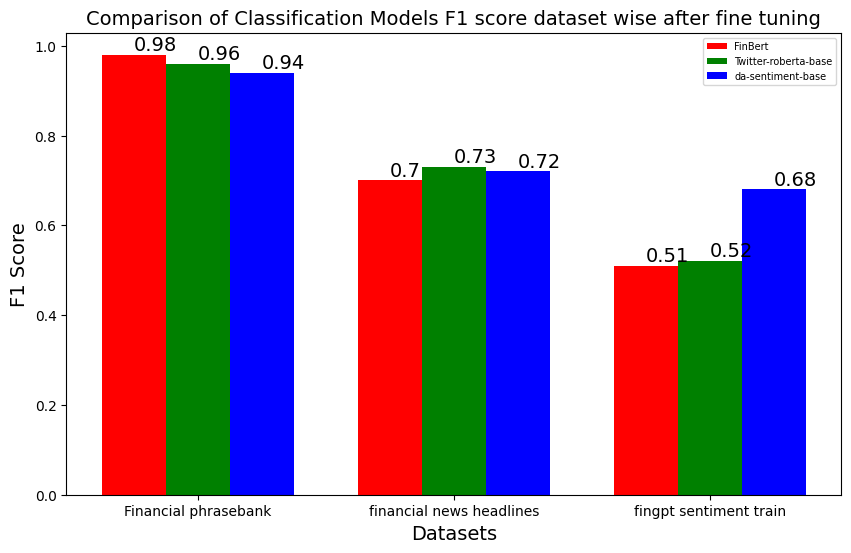

In [ ]:
# prompt: Plot a bar chart using the dictionaries finbert_f1_after,twitter_roberta_f1_after,da_sentiment_base_f1_after in a single graph. Also annotate data points

import matplotlib.pyplot as plt
x_axis = list(finbert_f1_after.keys())
finbert_f1_after = list(finbert_f1_after.values())
twitter_roberta_f1_after = list(twitter_roberta_f1_after.values())
da_sentiment_base_f1_after = list(da_sentiment_base_f1_after.values())

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define width of each bar
bar_width = 0.25

# Define x-axis positions for each set of bars
x_pos = [i for i in range(len(x_axis))]


# Create bars for each model - Accuracy
ax.bar(x_pos, finbert_f1_after, bar_width, label='FinBert', color='r')
ax.bar([i + bar_width for i in x_pos], twitter_roberta_f1_after, bar_width, label='Twitter-roberta-base', color='g')
ax.bar([i + 2*bar_width for i in x_pos], da_sentiment_base_f1_after, bar_width, label='da-sentiment-base', color='b')

# Add x-axis labels
ax.set_xticks([i + bar_width for i in x_pos])
ax.set_xticklabels(x_axis)

# Add title and labels
ax.set_title('Comparison of Classification Models F1 score dataset wise after fine tuning', fontsize=14)
ax.set_xlabel('Datasets', fontsize=14)
ax.set_ylabel('F1 Score', fontsize=14)

# Add legend
ax.legend(loc='upper right', fontsize=7)

# Add annotations
for i, v in enumerate(finbert_f1_after):
    ax.annotate(str(v), xy=(i, v + 0.01), fontsize=14)
for i, v in enumerate(twitter_roberta_f1_after):
    ax.annotate(str(v), xy=(i + bar_width, v + 0.01), fontsize=14)
for i, v in enumerate(da_sentiment_base_f1_after):
    ax.annotate(str(v), xy=(i + 2*bar_width, v + 0.01), fontsize=14)

# Show the plot
plt.show()


## Text generation models

In [ ]:
class_models = ['FlanT5-base','FlanT5-xl']

# class_acc_before = [.01,0.70,.56]
# class_f1_before = [.01,0.55,.56]

# x_axis = ['Financial phrasebank','financial news headlines','fingpt sentiment train']

Flan_T5base_acc_after={'Financial phrasebank':.97, 'financial news headlines':0.73, 'fingpt sentiment train':0.72}
Flan_T5_xl_after = {'Financial phrasebank':0.97,'financial news headlines':0.69,'fingpt sentiment train':.70}


# metrics  = {"accuracy":[finbert_acc_before,twitter_roberta_before,da_sentiment_base_before],"F1 score":[finbert_f1_before,twitter_roberta_f1_before,da_sentiment_base_f1_before]}

# class_acc_after = [.98,0.97,.87]
# class_f1_after = [.98,0.96,.81]


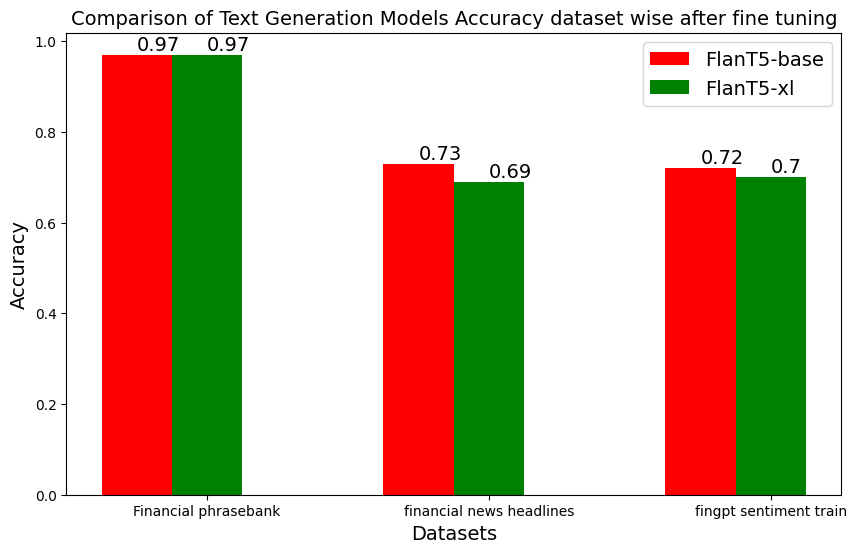

In [ ]:
# prompt: Plot a bar chart using the dictionary Flan_T5base_acc_after, Flan_T5_xl_after in a single graph. Also annotate data points

import matplotlib.pyplot as plt
x_axis = list(Flan_T5base_acc_after.keys())
y_axis1 = list(Flan_T5base_acc_after.values())
y_axis2 = list(Flan_T5_xl_after.values())

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define width of each bar
bar_width = 0.25

# Define x-axis positions for each set of bars
x_pos = [i for i in range(len(x_axis))]


# Create bars for each model - Accuracy
ax.bar(x_pos, y_axis1, bar_width, label='FlanT5-base', color='r')
ax.bar([i + bar_width for i in x_pos], y_axis2, bar_width, label='FlanT5-xl', color='g')

# Add x-axis labels
ax.set_xticks([i + bar_width for i in x_pos])
ax.set_xticklabels(x_axis)

# Add title and labels
ax.set_title('Comparison of Text Generation Models Accuracy dataset wise after fine tuning', fontsize=14)
ax.set_xlabel('Datasets', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

# Add legend
ax.legend(loc='upper right', fontsize=14)

# Add annotations
for i, v in enumerate(y_axis1):
    ax.annotate(str(v), xy=(i, v + 0.01), fontsize=14)
for i, v in enumerate(y_axis2):
    ax.annotate(str(v), xy=(i + bar_width, v + 0.01), fontsize=14)

# Show the plot
plt.show()


In [ ]:
Flan_T5base_f1_after={'Financial phrasebank':.97, 'financial news headlines':0.73, 'fingpt sentiment train':0.40}
Flan_T5_xl_f1_after = {'Financial phrasebank':0.97,'financial news headlines':0.68,'fingpt sentiment train':.68}

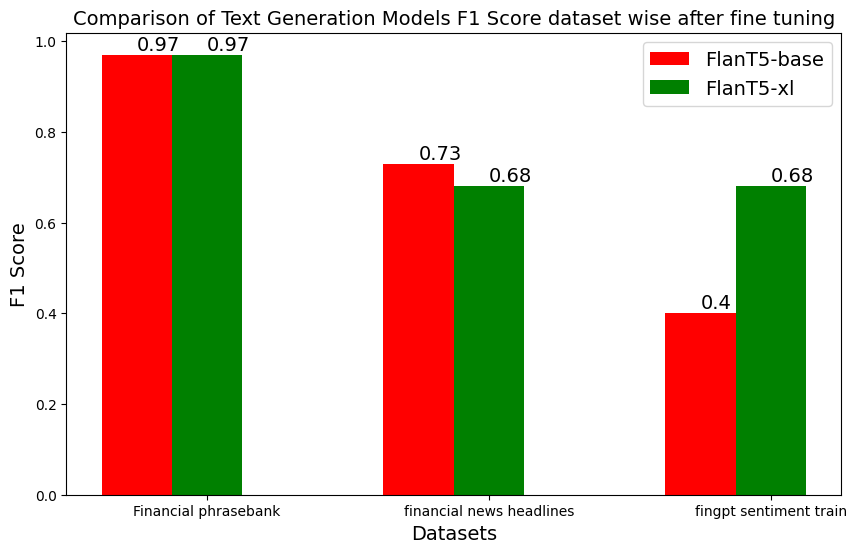

In [ ]:
# prompt: Plot a bar chart using the dictionary Flan_T5base_f1_after, Flan_T5_xl_f1_after in a single graph. Also annotate data point

import matplotlib.pyplot as plt
x_axis = list(Flan_T5base_f1_after.keys())
y_axis1 = list(Flan_T5base_f1_after.values())
y_axis2 = list(Flan_T5_xl_f1_after.values())

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define width of each bar
bar_width = 0.25

# Define x-axis positions for each set of bars
x_pos = [i for i in range(len(x_axis))]


# Create bars for each model - Accuracy
ax.bar(x_pos, y_axis1, bar_width, label='FlanT5-base', color='r')
ax.bar([i + bar_width for i in x_pos], y_axis2, bar_width, label='FlanT5-xl', color='g')

# Add x-axis labels
ax.set_xticks([i + bar_width for i in x_pos])
ax.set_xticklabels(x_axis)

# Add title and labels
ax.set_title('Comparison of Text Generation Models F1 Score dataset wise after fine tuning', fontsize=14)
ax.set_xlabel('Datasets', fontsize=14)
ax.set_ylabel('F1 Score', fontsize=14)

# Add legend
ax.legend(loc='upper right', fontsize=14)

# Add annotations
for i, v in enumerate(y_axis1):
    ax.annotate(str(v), xy=(i, v + 0.01), fontsize=14)
for i, v in enumerate(y_axis2):
    ax.annotate(str(v), xy=(i + bar_width, v + 0.01), fontsize=14)

# Show the plot
plt.show()


## Text2Text generation models

In [ ]:
FinGPT_acc_after={'Financial phrasebank':0.36, 'financial news headlines':0.50, 'fingpt sentiment train':0.14}
InternLM_acc_after = {'Financial phrasebank':0.88,'financial news headlines':0.58,'fingpt sentiment train':.38}
Mistral_acc_after = {'Financial phrasebank':0.79,'financial news headlines':0.55,'fingpt sentiment train':0.0}

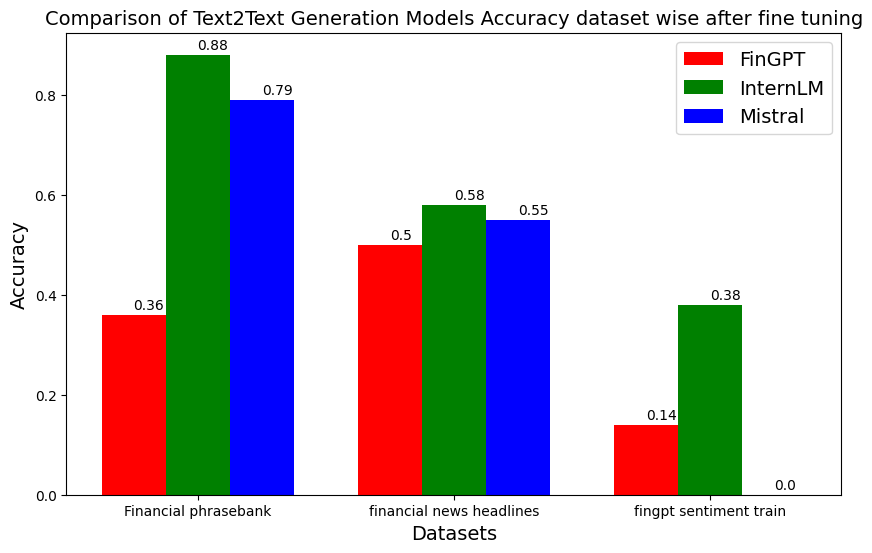

In [ ]:
# prompt: Plot a bar chart using the dictionary FinGPT_acc_after, InternLM_acc_after, Mistral_acc_after in a single graph. Also annotate data point

import matplotlib.pyplot as plt
x_axis = list(FinGPT_acc_after.keys())
FinGPT_acc_after = list(FinGPT_acc_after.values())
InternLM_acc_after = list(InternLM_acc_after.values())
Mistral_acc_after = list(Mistral_acc_after.values())

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define width of each bar
bar_width = 0.25

# Define x-axis positions for each set of bars
x_pos = [i for i in range(len(x_axis))]


# Create bars for each model - Accuracy
ax.bar(x_pos, FinGPT_acc_after, bar_width, label='FinGPT', color='r')
ax.bar([i + bar_width for i in x_pos], InternLM_acc_after, bar_width, label='InternLM', color='g')
ax.bar([i + 2*bar_width for i in x_pos], Mistral_acc_after, bar_width, label='Mistral', color='b')

# Add x-axis labels
ax.set_xticks([i + bar_width for i in x_pos])
ax.set_xticklabels(x_axis)

# Add title and labels
ax.set_title('Comparison of Text2Text Generation Models Accuracy dataset wise after fine tuning', fontsize=14)
ax.set_xlabel('Datasets', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

# Add legend
ax.legend(loc='upper right', fontsize=14)

# Add annotations
for i, v in enumerate(FinGPT_acc_after):
    ax.annotate(str(v), xy=(i, v + 0.01), fontsize=10)
for i, v in enumerate(InternLM_acc_after):
    ax.annotate(str(v), xy=(i + bar_width, v + 0.01), fontsize=10)
for i, v in enumerate(Mistral_acc_after):
    ax.annotate(str(v), xy=(i + 2*bar_width, v + 0.01), fontsize=10)

# Show the plot
plt.show()


In [ ]:
FinGPT_f1_after={'Financial phrasebank':0.43, 'financial news headlines':0.46, 'fingpt sentiment train':0.14}
InternLM_f1_after = {'Financial phrasebank':0.87,'financial news headlines':0.56,'fingpt sentiment train':.31}
Mistral_f1_after = {'Financial phrasebank':0.74,'financial news headlines':0.52,'fingpt sentiment train':0.0}

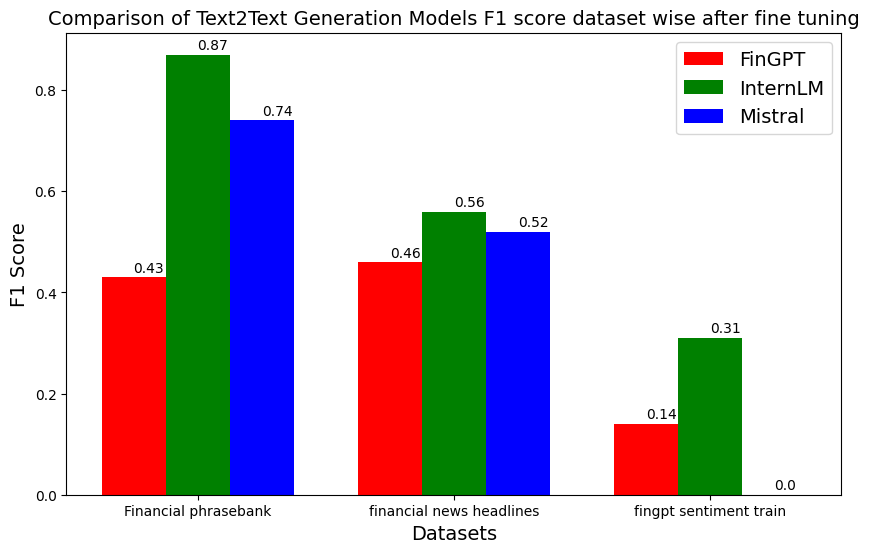

In [ ]:
# prompt: Plot a bar chart using the dictionary FinGPT_f1_after, InternLM_f1_after, Mistral_f1_after a single graph. Also annotate data point

import matplotlib.pyplot as plt
x_axis = list(FinGPT_f1_after.keys())
FinGPT_f1_after = list(FinGPT_f1_after.values())
InternLM_f1_after = list(InternLM_f1_after.values())
Mistral_f1_after = list(Mistral_f1_after.values())

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define width of each bar
bar_width = 0.25

# Define x-axis positions for each set of bars
x_pos = [i for i in range(len(x_axis))]


# Create bars for each model - Accuracy
ax.bar(x_pos, FinGPT_f1_after, bar_width, label='FinGPT', color='r')
ax.bar([i + bar_width for i in x_pos], InternLM_f1_after, bar_width, label='InternLM', color='g')
ax.bar([i + 2*bar_width for i in x_pos], Mistral_f1_after, bar_width, label='Mistral', color='b')

# Add x-axis labels
ax.set_xticks([i + bar_width for i in x_pos])
ax.set_xticklabels(x_axis)

# Add title and labels
ax.set_title('Comparison of Text2Text Generation Models F1 score dataset wise after fine tuning', fontsize=14)
ax.set_xlabel('Datasets', fontsize=14)
ax.set_ylabel('F1 Score', fontsize=14)

# Add legend
ax.legend(loc='upper right', fontsize=14)

# Add annotations
for i, v in enumerate(FinGPT_f1_after):
    ax.annotate(str(v), xy=(i, v + 0.01), fontsize=10)
for i, v in enumerate(InternLM_f1_after):
    ax.annotate(str(v), xy=(i + bar_width, v + 0.01), fontsize=10)
for i, v in enumerate(Mistral_f1_after):
    ax.annotate(str(v), xy=(i + 2*bar_width, v + 0.01), fontsize=10)

# Show the plot
plt.show()
